<a href="https://colab.research.google.com/github/Lasya-1408/Cardiovascular-risk-prediction-Almabetter/blob/main/Cardiovascular_risk_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Cardiovascular risk prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual


# **Project Summary -**

The given dataset contains the risk prediction of cardiovascular diseases where we have other parameters like age, education, sex, is_smoking, cigsperday, BPMeds, prevalent_stroke, prevalent_hyp, diabetes, totChol, sysBP, diaBP, BMI, heartrate, and glucose. Here TenYearCHD represents the risk prediction of cardiovascular diseases which is a target variable and remaining variables are considered as independent variables. First we perform univariate and bivariate analysis to analyse the relation among the independent variables. Correlation between target and independent variable is calculated, also with the help of heatmap we have selected features which are to be involved in model building. For these selected features we treat missing values, outliers, create new features from them, apply scaling and transformation techniques making them ready for model building. Finally we perform model building and check for the accurate evaluation metric score.

# **GitHub Link -**

https://github.com/Lasya-1408/Cardiovascular-risk-prediction-Almabetter

# **Problem Statement**


**The aim of the project is to predict the risk of cardiovascular diseases of an individual given few independent variables which effect heart. The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. To perform data visualizations among the variables, and check multicollinearity for feature selection. To perform feature engineering and manipulation for the selected features and in the end to build models which give accurate evaluation metric score.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
# For performing mathematical operations on dataset
import numpy as np
from numpy import math

# For accessing dataset
import pandas as pd

# For visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# For missing values
from sklearn.impute import KNNImputer

# data splitting
from sklearn.model_selection import train_test_split

# Normalising the data
from sklearn.preprocessing import MinMaxScaler

# For handling data imbalance
from imblearn.over_sampling import SMOTE

# Model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import PowerTransformer

# Evaluation metrics
from sklearn.metrics import recall_score, confusion_matrix

### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Copy the file
path = '/content/drive/MyDrive/Datasets_Almabetter/data_cardiovascular_risk.csv'
# Read the file
df = pd.read_csv(path)

### Dataset First View

In [4]:
# Dataset First Look
df

id  age  education sex is_smoking  cigsPerDay  BPMeds  \
0        0   64        2.0   F        YES         3.0     0.0   
1        1   36        4.0   M         NO         0.0     0.0   
2        2   46        1.0   F        YES        10.0     0.0   
3        3   50        1.0   M        YES        20.0     0.0   
4        4   64        1.0   F        YES        30.0     0.0   
...    ...  ...        ...  ..        ...         ...     ...   
3385  3385   60        1.0   F         NO         0.0     0.0   
3386  3386   46        1.0   F         NO         0.0     0.0   
3387  3387   44        3.0   M        YES         3.0     0.0   
3388  3388   60        1.0   M         NO         0.0     NaN   
3389  3389   54        3.0   F         NO         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    221.0  148.0   85.0    NaN   
1                   0             1         0    212.0  168.0   98.0  29.77   
2                   0             0         0    250.0  116.0   71.0  20.35   
3                   0             1         0    233.0  158.0   88.0  28.26   
4                   0             0         0    241.0  136.5   85.0  26.42   
...               ...           ...       ...      ...    ...    ...    ...   
3385                0             0         0    261.0  123.5   79.0  29.28   
3386                0             0         0    199.0  102.0   56.0  21.96   
3387                0             1         0    352.0  164.0  119.0  28.92   
3388                0             1         0    191.0  167.0  105.0  23.01   
3389                0             0         0    288.0  124.0   77.0  29.88   

      heartRate  glucose  TenYearCHD  
0          90.0     80.0           1  
1          72.0     75.0           0  
2          88.0     94.0           0  
3          68.0     94.0           1  
4          70.0     77.0           0  
...         ...      ...         ...  
3385       70.0    103.0           0  
3386       80.0     84.0           0  
3387       73.0     72.0           1  
3388       80.0     85.0           0  
3389       79.0     92.0           0  

[3390 rows x 17 columns]

In [5]:
# Top 5 rows of the dataset
df.head()

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

In [6]:
# Last 5 rows of dataset
df.tail()

id  age  education sex is_smoking  cigsPerDay  BPMeds  \
3385  3385   60        1.0   F         NO         0.0     0.0   
3386  3386   46        1.0   F         NO         0.0     0.0   
3387  3387   44        3.0   M        YES         3.0     0.0   
3388  3388   60        1.0   M         NO         0.0     NaN   
3389  3389   54        3.0   F         NO         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
3385                0             0         0    261.0  123.5   79.0  29.28   
3386                0             0         0    199.0  102.0   56.0  21.96   
3387                0             1         0    352.0  164.0  119.0  28.92   
3388                0             1         0    191.0  167.0  105.0  23.01   
3389                0             0         0    288.0  124.0   77.0  29.88   

      heartRate  glucose  TenYearCHD  
3385       70.0    103.0           0  
3386       80.0     84.0           0  
3387       73.0     72.0           1  
3388       80.0     85.0           0  
3389       79.0     92.0           0

### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
# Dataset Rows count
print('The number of rows are',len(df.index))

# Dataset Columns
print('The number of columns are',len(df.columns))

The number of rows are 3390
The number of columns are 17


### Dataset Information

In [8]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

There are no duplicate values in the given dataset

#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
print(df.isnull().sum())

def show_missing():
    missing = df.columns[df.isnull().any()].tolist()
    return missing
print('Null values in percentages')
print(round(df[show_missing()].isnull().sum().sort_values(ascending = False)/len(df)*100,2))

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64
Null values in percentages
glucose       8.97
education     2.57
BPMeds        1.30
totChol       1.12
cigsPerDay    0.65
BMI           0.41
heartRate     0.03
dtype: float64


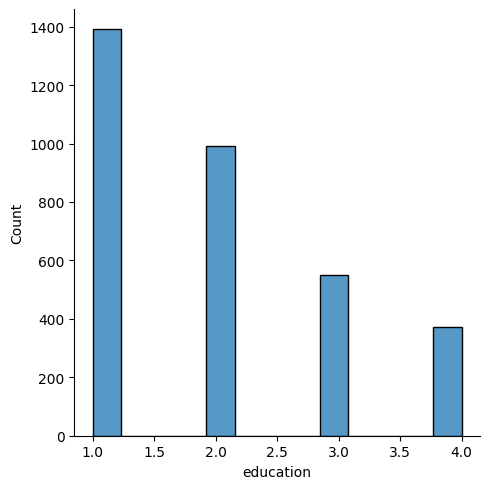

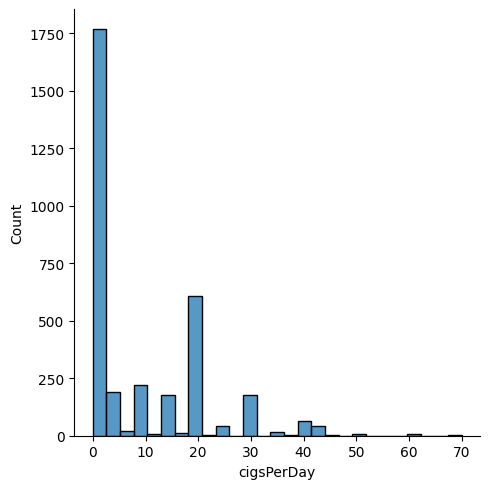

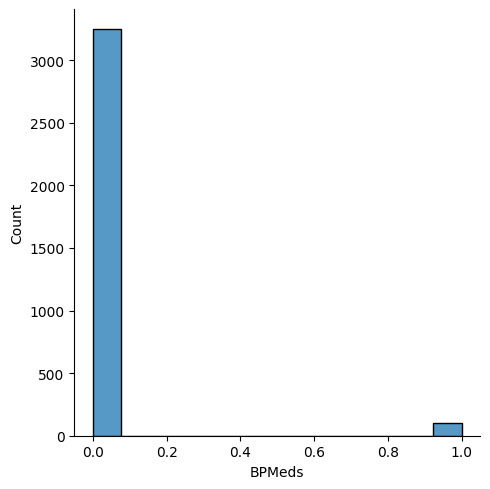

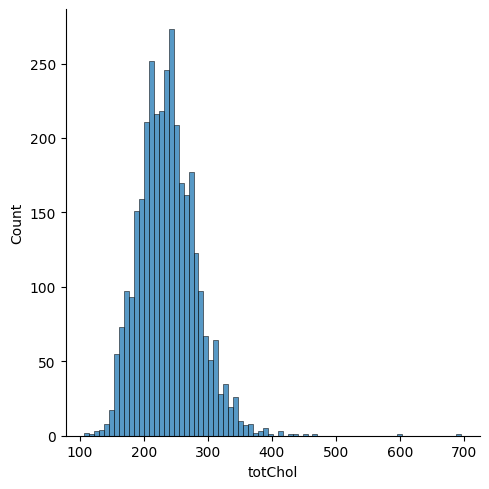

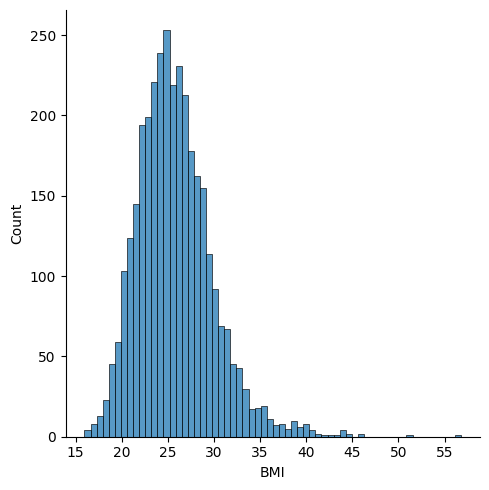

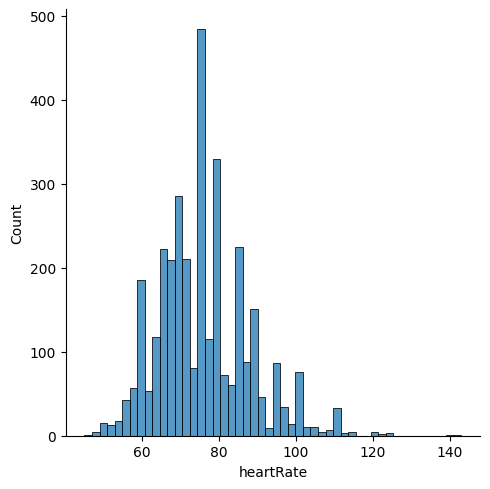

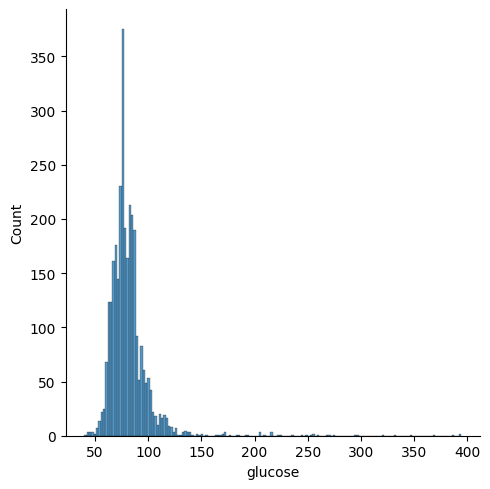

In [11]:
# Visualizing the missing values
missing_values_columns = df[show_missing()].columns.tolist()
for i in missing_values_columns:
  sns.displot(df[i])

From the above plots, we see that all the variables are having positively skewed distribution. Hence, we impute with median and mode for numerical and categorical variables respectively except for glucose as it has maximum missing values.

In [12]:
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

### What did you know about your dataset?

The given dataset has 3390 rows and 17 columns
* id, age, education, sex, is_smoking, cigsPerDay, BPMeds, prevalentStroke, prevalentHyp, diabetes, totChol, sysBP, diaBP, BMI, heartRate, glucose, and TenYearCHD are the variables present in the dataset.
*  There are no duplicate values in the dataset.
*  From the given dataset, we see that the target variable is TenYearCHD.
*  Moreover, we notice that education, cigsperday, BPMeds, totChol, BMI, heartrate, and glucose are having 87, 22, 44, 38, 14, 1, and 304 missing values.

## ***2. Understanding Your Variables***

In [13]:
# Dataset Columns
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [14]:
# Dataset Describe
df.describe()

id          age    education   cigsPerDay       BPMeds  \
count  3390.000000  3390.000000  3303.000000  3368.000000  3346.000000   
mean   1694.500000    49.542183     1.970936     9.069477     0.029886   
std     978.753033     8.592878     1.019081    11.879078     0.170299   
min       0.000000    32.000000     1.000000     0.000000     0.000000   
25%     847.250000    42.000000     1.000000     0.000000     0.000000   
50%    1694.500000    49.000000     2.000000     0.000000     0.000000   
75%    2541.750000    56.000000     3.000000    20.000000     0.000000   
max    3389.000000    70.000000     4.000000    70.000000     1.000000   

       prevalentStroke  prevalentHyp     diabetes      totChol       sysBP  \
count      3390.000000   3390.000000  3390.000000  3352.000000  3390.00000   
mean          0.006490      0.315339     0.025664   237.074284   132.60118   
std           0.080309      0.464719     0.158153    45.247430    22.29203   
min           0.000000      0.000000     0.000000   107.000000    83.50000   
25%           0.000000      0.000000     0.000000   206.000000   117.00000   
50%           0.000000      0.000000     0.000000   234.000000   128.50000   
75%           0.000000      1.000000     0.000000   264.000000   144.00000   
max           1.000000      1.000000     1.000000   696.000000   295.00000   

             diaBP          BMI    heartRate      glucose   TenYearCHD  
count  3390.000000  3376.000000  3389.000000  3086.000000  3390.000000  
mean     82.883038    25.794964    75.977279    82.086520     0.150737  
std      12.023581     4.115449    11.971868    24.244753     0.357846  
min      48.000000    15.960000    45.000000    40.000000     0.000000  
25%      74.500000    23.020000    68.000000    71.000000     0.000000  
50%      82.000000    25.380000    75.000000    78.000000     0.000000  
75%      90.000000    28.040000    83.000000    87.000000     0.000000  
max     142.500000    56.800000   143.000000   394.000000     1.000000

### Variables Description

1.   id - A unique id given to each record/row
2.   age - Age of the patient
3.   education - Education of the patient
4.   sex - Gender of the patient
5.   is_smoking - Whether the patient is currently smoking or not
6.  cigsperday - Cigarettes smoked per day
7.   BPMeds - Whether patient is taking BP medicines or not
8.   Prevalent stroke - If the patient has a history of stroke
9.   Prevalent Hyp - If the patient has a history of hyper tension
10.   diabetes - If patient has diabetes or not
11.   totChol - Cholesterol measure of patient
12.   sysBP - Systolic BP measure of patient
13.   diaBP - Diastolic BP measure of patient
14.   BMI - Body mass index of the patient
15.   heartrate - Heartrate of the patient
16.   glucose - glucose measure of the patient
17.   TenYearCHD - heart disease risk prediction. If yes (1) and no (0)

### Check Unique Values for each variable.

In [15]:
# Check Unique Values for each variable.
df['id'].unique()

array([   0,    1,    2, ..., 3387, 3388, 3389])

In [16]:
df['age'].unique()

array([64, 36, 46, 50, 61, 41, 55, 53, 43, 44, 58, 51, 56, 42, 38, 63, 35,
       54, 62, 47, 34, 39, 59, 45, 49, 60, 40, 52, 48, 37, 65, 57, 68, 67,
       33, 66, 69, 70, 32])

In [17]:
df['education'].unique()

array([ 2.,  4.,  1.,  3., nan])

In [18]:
df['sex'].unique()

array(['F', 'M'], dtype=object)

In [19]:
df['is_smoking'].unique()

array(['YES', 'NO'], dtype=object)

In [20]:
df['cigsPerDay'].unique()

array([ 3.,  0., 10., 20., 30., 35., 40., 15.,  9., 60., 17., 25.,  5.,
       43.,  7., 50., 19., 18.,  1., 45.,  2.,  6., nan, 11.,  8.,  4.,
       14., 16., 23., 13., 12., 70., 38.])

In [21]:
df['BPMeds'].unique()

array([ 0., nan,  1.])

In [22]:
df['prevalentStroke'].unique()

array([0, 1])

In [23]:
df['prevalentHyp'].unique()

array([0, 1])

In [24]:
df['diabetes'].unique()

array([0, 1])

In [25]:
df['TenYearCHD'].unique()

array([1, 0])

## 3. ***Data Wrangling***

### Data Wrangling Code

In [26]:
# Write your code to make your dataset analysis ready.
df.drop('id', axis=1, inplace = True)
df['pulse_pressure'] = df['sysBP'] - df['diaBP']

In [27]:
df.head()

age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   64        2.0   F        YES         3.0     0.0                0   
1   36        4.0   M         NO         0.0     0.0                0   
2   46        1.0   F        YES        10.0     0.0                0   
3   50        1.0   M        YES        20.0     0.0                0   
4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  pulse_pressure  
0           1            63.0  
1           0            70.0  
2           0            45.0  
3           1            70.0  
4           0            51.5

### What all manipulations have you done and insights you found?

From the dataset,
* We removed id column since it has as many number of unique values as number of rows. Therefore, it is not needed in the dataset while model building.
* Pulse pressure is calculated from sysBP and diaBP, as the information can be extracted from single variable instead of these two variables while model building.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

## ***1.Univariate Analysis***

### 1.1 TenYearCHD distribution

Text(0.5, 1.0, 'Ten Year CHD distribution')

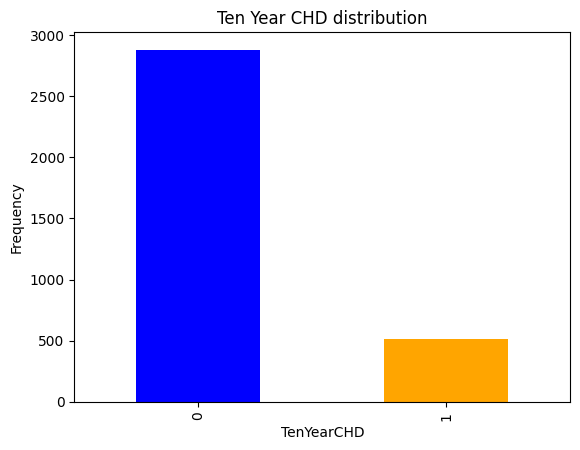

In [28]:
# Chart - 1 visualization code
df['TenYearCHD'].value_counts().plot(kind = 'bar', color = ('blue', 'orange'))
plt.xlabel('TenYearCHD')
plt.ylabel('Frequency')
plt.title('Ten Year CHD distribution')

In [29]:
df['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

##### 1. Why did you pick the specific chart?

To understand the distribution of TenYearCHD variable, a bar chart is chosen as it is a categorical variable. Therefore, easy to visualize through bar chart.

##### 2. What is/are the insight(s) found from the chart?

From the bar plot, we see that most of the patients (2879) did not have a risk of coronary heart disease (CHD), whereas only few (511) of them are having risk of CHD.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the above conclusion, it is good to see that less number of people are having risk of CHD. But then we should also check the factors which effects patients who are prone to CHD.

### 1.2 Age and BMI distributions

Text(0.5, 1.0, 'BMI distribution')

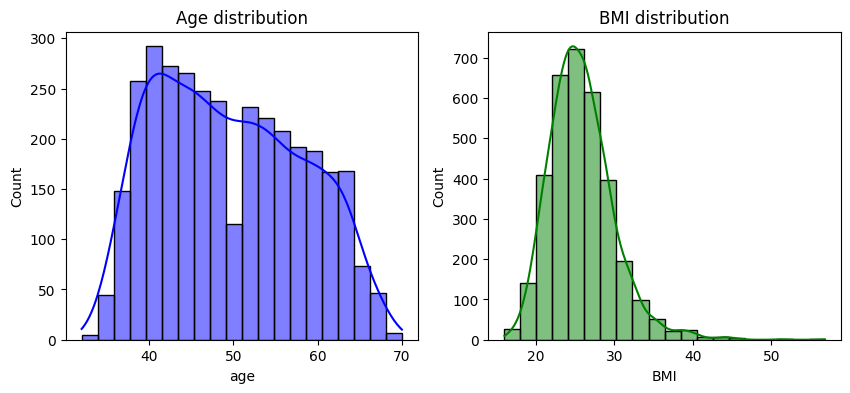

In [30]:
# Chart - 2 visualization code

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot distribution plots in the first subplot
sns.histplot(df['age'], kde=True, ax=axs[0], color='blue', bins=20)
axs[0].set_title('Age distribution')

# Plot distribution plots in the second subplot
sns.histplot(df['BMI'], kde=True, ax=axs[1], color='green', bins=20)
axs[1].set_title('BMI distribution')

##### 1. Why did you pick the specific chart?

To understand the distribution of age and BMI, we choose distribution plot as age and BMI are continous variables. It is easy to visualize through hist plot.

##### 2. What is/are the insight(s) found from the chart?

From above displot,
* We have different age groups of patients in the records. The range starts from 35 to 70 where most of the patients belongs to 40 years old.
* In BMI, maximum BMI measure is in between 25 and 30, and the least is 40.

### 1.3 Sex and Education charts

Text(0.5, 1.0, 'Education plot')

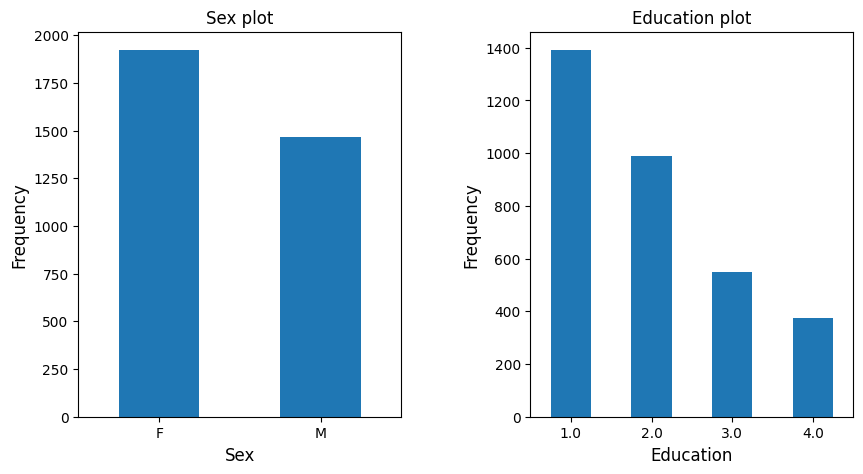

In [31]:
# Chart - 3 visualization code

fig, axs = plt.subplots(1,2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

df['sex'].value_counts().plot(figsize = (10,5), kind = 'bar', ax=axs[0], rot=0)

df['education'].value_counts().plot(figsize = (10,5), kind = 'bar',ax=axs[1], rot=0)

axs[0].set_xlabel('Sex',fontsize=12)
axs[0].set_ylabel('Frequency', fontsize=12)
axs[0].set_title('Sex plot', fontsize=12)

axs[1].set_xlabel('Education', fontsize=12)
axs[1].set_ylabel('Frequency',  fontsize=12)
axs[1].set_title('Education plot')


##### 1. Why did you pick the specific chart?

To understand the charts of sex and education, we choose bar plot as they both are categorical variables. It will be easy to visualize the chart.

##### 2. What is/are the insight(s) found from the chart?

From the above barplots,
* In sex chart, we have more female records than male in the given dataset.
* In education chart, we have categories (1,2,3,4) from which most of the patients belong to category 1.

### 1.4 Is_smoking and CigsPerDay distribution

Text(0.5, 1.0, 'Smoking frequency')

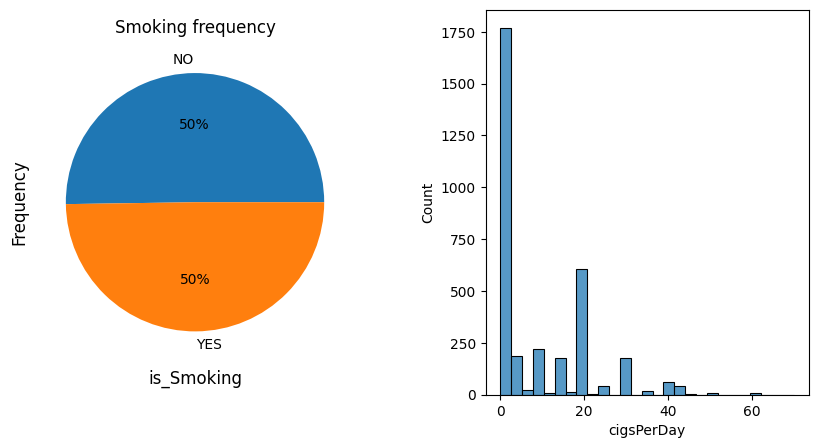

In [32]:
# Chart - 4 visualization code
fig, axs = plt.subplots(1,2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

df['is_smoking'].value_counts().plot(figsize = (10,5), kind = 'pie', autopct="%.0f%%", ax=axs[0], rot=0)

sns.histplot(df['cigsPerDay'], ax=axs[1])

axs[0].set_xlabel('is_Smoking',fontsize=12)
axs[0].set_ylabel('Frequency', fontsize=12)
axs[0].set_title('Smoking frequency', fontsize=12)


##### 1. Why did you pick the specific chart?

To understand the distributions of is_smoking and cigsperday, we choose pie plot and histplot respectively depending on the type of variable. This way it is easy to visualize the charts.

##### 2. What is/are the insight(s) found from the chart?

* From pie plot, we see that number of patients smoking and are not smoking are of same percentage(50).
* From histplot, we see that there are maximum records for zero cigerattes per day which comes under no smoking category and 20 is the maximum number of cigerattes smoked per day as per the given dataset.

### 1.5 Sys BP and diaBP distribution

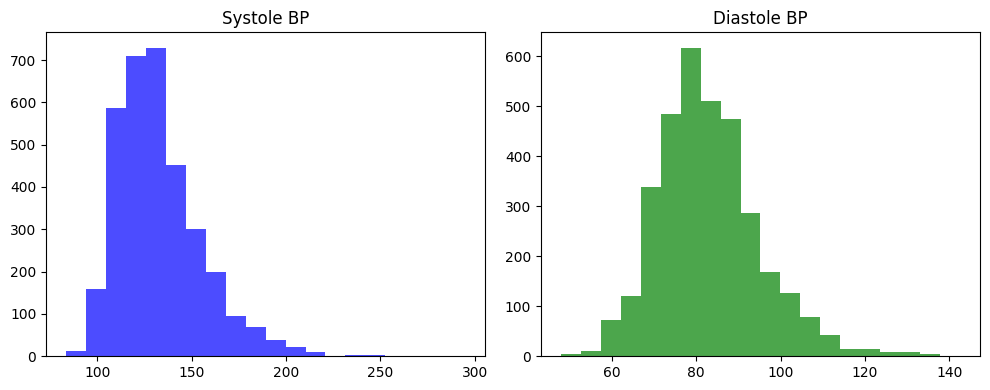

In [33]:
# Chart - 5 visualization code

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot histograms in the first subplot
axs[0].hist(df['sysBP'], bins=20, color='blue', alpha=0.7)
axs[0].set_title('Systole BP')

# Plot histograms in the second subplot
axs[1].hist(df['diaBP'], bins=20, color='green', alpha=0.7)
axs[1].set_title('Diastole BP')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

To understand the distribution of sysBP and diaBP, we choose distribution plot as they both are continous variables. It will be easy to visualize the charts.

##### 2. What is/are the insight(s) found from the chart?

From the above plots, we see that systole BP is positively skewed having maximum measure in between 100 and 120, whereas diastole distribution is almost normal having maximum measure of 80.

### 1.6 Prevalent stroke and prevalent hyp distribution

Text(0.5, 1.0, 'prevalent hyper tension frequency')

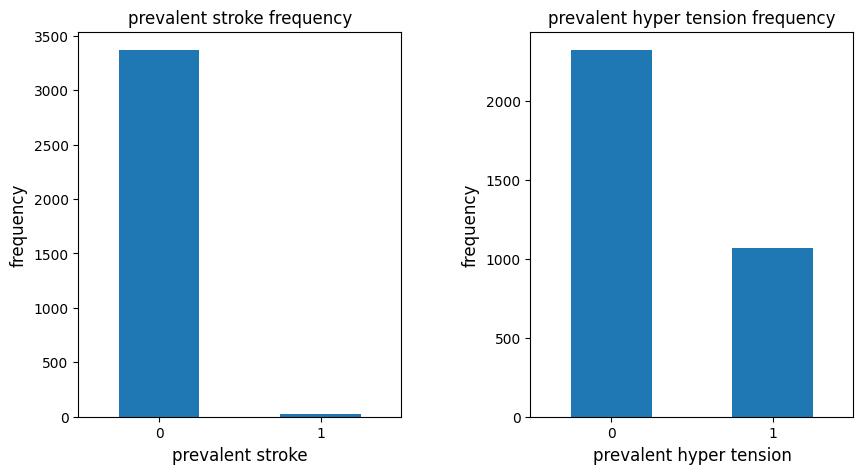

In [34]:
# Chart - 6 visualization code

fig, axs = plt.subplots(1,2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

df['prevalentStroke'].value_counts().plot(figsize = (10,5), kind = 'bar', ax=axs[0], rot=0)

df['prevalentHyp'].value_counts().plot(figsize = (10,5), kind = 'bar',ax=axs[1], rot=0)



axs[0].set_xlabel('prevalent stroke',fontsize=12)
axs[0].set_ylabel('frequency', fontsize=12)
axs[0].set_title('prevalent stroke frequency', fontsize=12)


axs[1].set_xlabel('prevalent hyper tension', fontsize=12)
axs[1].set_ylabel('frequency',  fontsize=12)
axs[1].set_title('prevalent hyper tension frequency')


##### 1. Why did you pick the specific chart?

To understand the distributions of prevalent stroke and prevalent hyper tension, we choose bar plots as they are categorical variables.

##### 2. What is/are the insight(s) found from the chart?

From the above bar plots,
* In prevalent stroke plot, there are very few patients who are having previous history of stroke.
* In prevalent hyper tension plot, there are about half of the records with previous hyper tension reports

### 1.7 Glucose and heartrate distribution

Text(0.5, 1.0, 'Heartrate measurement plot')

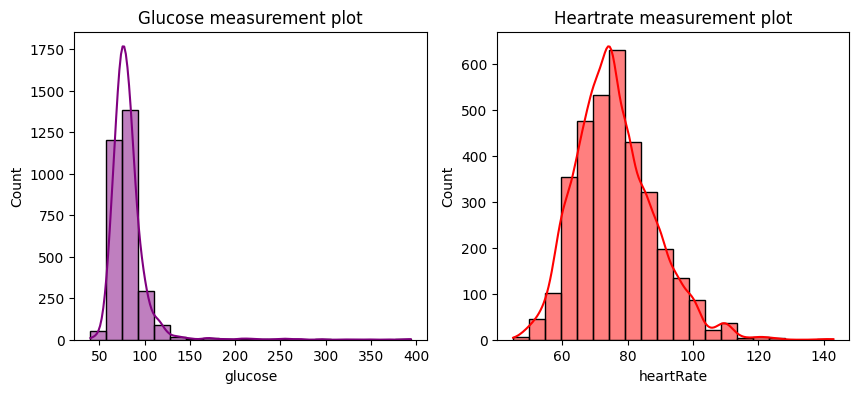

In [35]:
# Chart - 7 visualization code
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot distribution plots in the first subplot
sns.histplot(df['glucose'], kde=True, ax=axs[0], color='purple', bins=20)
axs[0].set_title('Glucose measurement plot')

# Plot distribution plots in the second subplot
sns.histplot(df['heartRate'], kde=True, ax=axs[1], color='red', bins=20)
axs[1].set_title('Heartrate measurement plot')


##### 1. Why did you pick the specific chart?

To understand the distribution of glucose and heartrate, we choose histplots as they both are continous variables.

##### 2. What is/are the insight(s) found from the chart?

From above bar plots,
* In glucose plot, we see that it is positively skewed with a maximum measure of around 90
* In heartrate plot, we notice that the plot is normally distributed with a maximum measure of 80.

### 1.8 Diabetes and BPMeds distribution

Text(0.5, 1.0, 'BPMeds count')

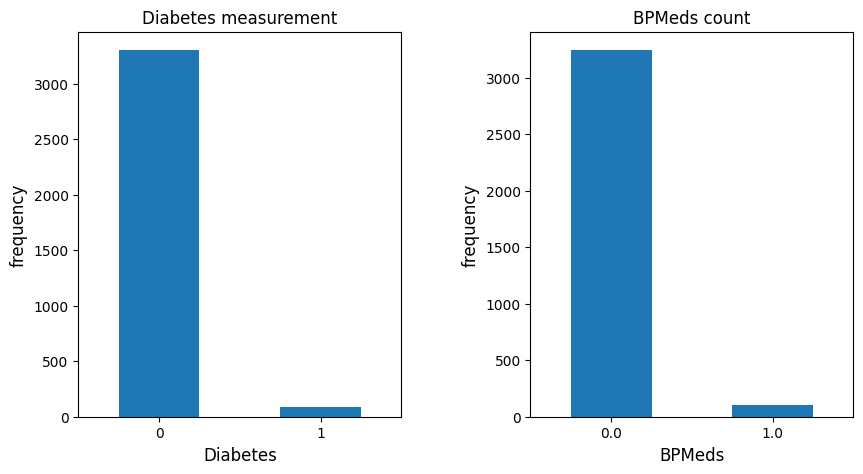

In [36]:
# Chart - 8 visualization code
fig, axs = plt.subplots(1,2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

df['diabetes'].value_counts().plot(figsize = (10,5), kind = 'bar', ax=axs[0], rot=0)

df['BPMeds'].value_counts().plot(figsize = (10,5), kind = 'bar',ax=axs[1], rot=0)



axs[0].set_xlabel('Diabetes',fontsize=12)
axs[0].set_ylabel('frequency', fontsize=12)
axs[0].set_title('Diabetes measurement', fontsize=12)


axs[1].set_xlabel('BPMeds', fontsize=12)
axs[1].set_ylabel('frequency',  fontsize=12)
axs[1].set_title('BPMeds count')

##### 1. Why did you pick the specific chart?

To understand the distribution of diabetes and BPMeds, we choose bar plot as they both are categorical variables.

##### 2. What is/are the insight(s) found from the chart?

From above plots,
* In diabetes plot, there are very few patients who are having diabetes.
* In BPMeds plot, less number of patients are taking BP medicines.

### 1.9 Total cholesterol distribution

<Axes: >

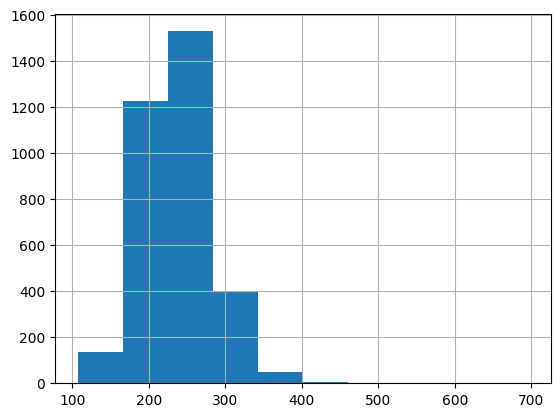

In [37]:
# Chart - 9 visualization code
df['totChol'].hist()

##### 1. Why did you pick the specific chart?

A representation of the distribution of a continuous variable is called a histogram. It counts the number of data points that fall into each interval after dividing the variable's range into discrete intervals. Since totChol is a continous variable, histogram is chosen.

##### 2. What is/are the insight(s) found from the chart?

From the above plot, it is observed that the plot is almost normally distributed where maximum measure of total cholesterol is in between 200 and 300.

## **2. Bivariate Analysis**

### 2.1 TenYearCHD risk among different age groups

<Axes: xlabel='age'>

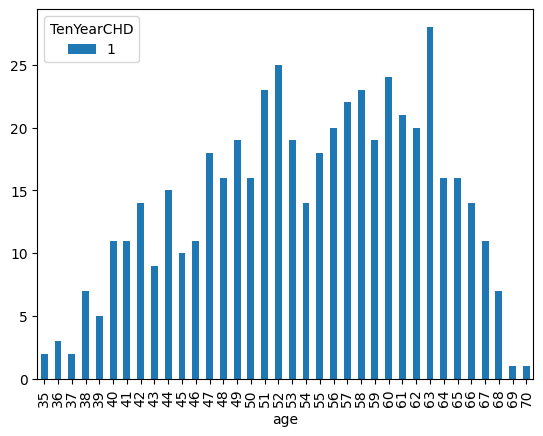

In [38]:
# Chart - 10 visualization code
#df.groupby('age')['TenYearCHD'].value_counts().unstack().plot(kind = 'line')
df_risk = df[df['TenYearCHD'] == 1]
df_risk.groupby('age')['TenYearCHD'].value_counts().unstack().plot(kind = 'bar')

##### 1. Why did you pick the specific chart?

Here to understand which age groups have risk of CHD, we choose bar plot as TenYearCHD is a categorical variable and also to be more accurate in visualizing the age.

##### 2. What is/are the insight(s) found from the chart?

From the above bar plot, most of the records who has risk to CHD are in the age group between 38 to 68 in which maximum patients having CHD risk are of 63 years old followed by 52 years old.

### 2.2 Effect of smoking and number of cigarettes on having risk for CHD

<Figure size 1000x500 with 0 Axes>

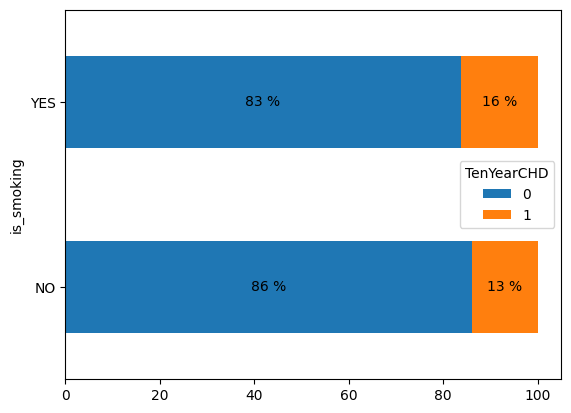

<Axes: xlabel='TenYearCHD', ylabel='cigsPerDay'>

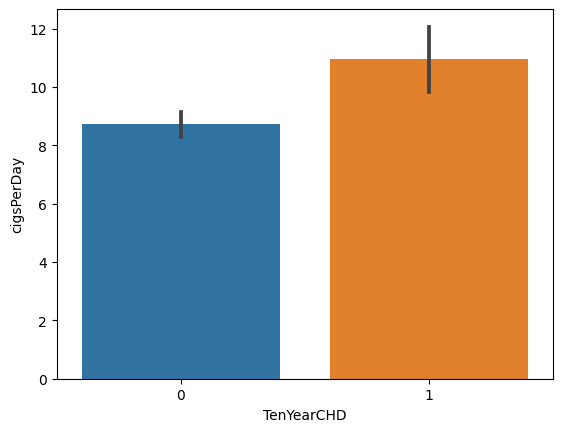

In [39]:
plt.figure(figsize=(10,5))
df_grouped = df.groupby('is_smoking')['TenYearCHD'].value_counts(normalize=True).unstack("TenYearCHD")*100
ax = df_grouped.plot.barh(stacked=True)

for ix, j in df_grouped.reset_index(drop=True).iterrows():
         #print(j)
        sum = 0
        for i in j:
            if i > 0:
                plt.text( sum + i / 2,ix, f"{int(i)} %", va="center", ha="center")
            sum += i
plt.show()

sns.barplot(x = 'TenYearCHD', y = 'cigsPerDay', data = df)

##### 1. Why did you pick the specific chart?

To understand whether there is a significant effect of smoking on having a risk for CHD, we choose stacked horizontal bar plot as they both are categorical variable. Also here we analyse the effect of number of cigarettes consumed per day

##### 2. What is/are the insight(s) found from the chart?

* In smoking bar plot, we conclude that 16% of patients are having risk for CHD under smoking category whereas 13% of patients are having risk under no smoking category. Therefore, smoking increases risk for CHD.
* In cigsperday plot, we notice that more number of cigarettes consumed per day leads to CHD.

### 2.3 TenYearCHD risk patients having prevalent stroke

<Figure size 1000x500 with 0 Axes>

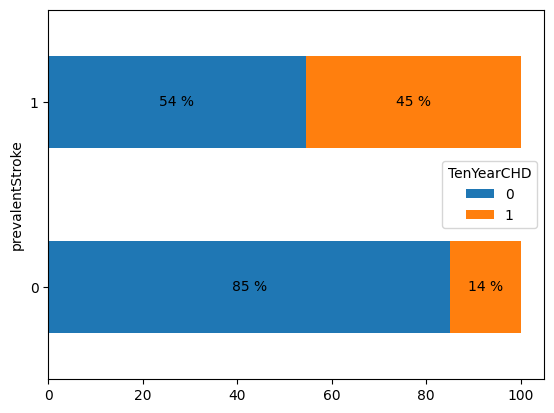

In [40]:
#Chart - 12 visualization code
plt.figure(figsize=(10,5))
df_grouped = df.groupby('prevalentStroke')['TenYearCHD'].value_counts(normalize=True).unstack("TenYearCHD")*100
ax = df_grouped.plot.barh(stacked=True)

for ix, j in df_grouped.reset_index(drop=True).iterrows():
         #print(j)
        sum = 0
        for i in j:
            if i > 0:
                plt.text( sum + i / 2,ix, f"{int(i)} %", va="center", ha="center")
            sum += i
plt.show()

##### 1. Why did you pick the specific chart?

To understand whether there is an effect of prevalent stroke on having risk for CHD, we choose stacked bar chart as they both are categorical variables.

##### 2. What is/are the insight(s) found from the chart?

From the above plot, we see that patients who had previous stroke history which are of 45% are majorly having risk for CHD than patients who did not have any previous stroke history which are of 14%.

### 2.4 TenYearCHD risk based on glucose measurement

<Axes: xlabel='TenYearCHD', ylabel='glucose'>

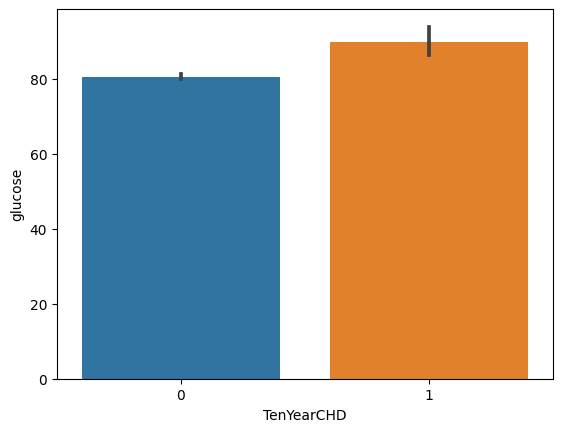

In [41]:
# Chart - 13 visualization code
sns.barplot(x=df['TenYearCHD'], y=df['glucose'])

##### 1. Why did you pick the specific chart?

To understand the effect of glucose level on CHD, we choose bar plot as TenYearCHD is a categorical variable.

##### 2. What is/are the insight(s) found from the chart?

From the above plot, we see that for measure of glucose upto 80, we dont see any difference whereas after 80 it seems like effecting to have risk for CHD.

### 2.5 TenYearCHD risk based on patient's prevalent Hyper tension

<Figure size 1000x500 with 0 Axes>

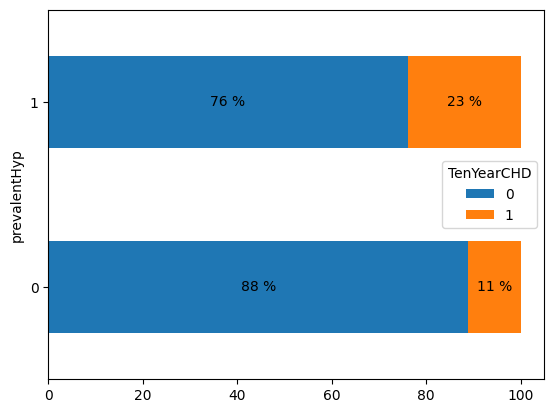

In [42]:
plt.figure(figsize=(10,5))
df_grouped = df.groupby('prevalentHyp')['TenYearCHD'].value_counts(normalize=True).unstack("TenYearCHD")*100
ax = df_grouped.plot.barh(stacked=True)

for ix, j in df_grouped.reset_index(drop=True).iterrows():
         #print(j)
        sum = 0
        for i in j:
            if i > 0:
                plt.text( sum + i / 2,ix, f"{int(i)} %", va="center", ha="center")
            sum += i
plt.show()

##### 1. Why did you pick the specific chart?

To understand whether having a history if hyper tension could lead to CHD, we choose stacked bar chart as they both are categorical variables.

##### 2. What is/are the insight(s) found from the chart?

From the above plot, we observe that when compared both the categories in hyper tension column, 23% of patients who are having history of hyper tension are having risk whereas patients who are not having history of hyper tension are of 11%.

### 2.6 Effect of heartrate on CHD

<Axes: xlabel='TenYearCHD', ylabel='heartRate'>

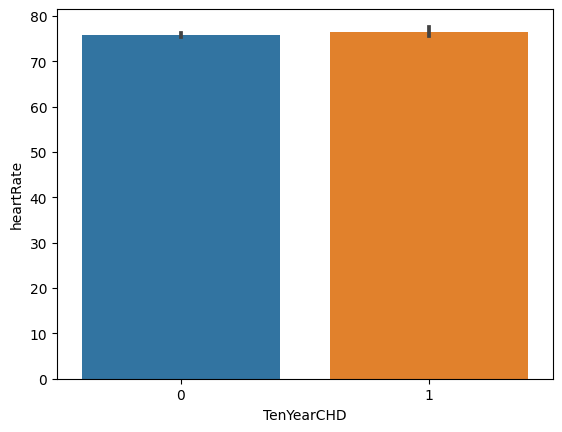

In [43]:
sns.barplot(x=df['TenYearCHD'], y=df['heartRate'])

##### 1. Why did you pick the specific chart?

To understand effect of heartrate on CHD, we choose stacked bar chart as there is a continuous and a categorical variable to visualize.

##### 2. What is/are the insight(s) found from the chart?

From the above plot, we observe that there is no significant effect of heartrate on CHD.

### 2.7 Effect of totChol on CHD

<Axes: xlabel='TenYearCHD', ylabel='totChol'>

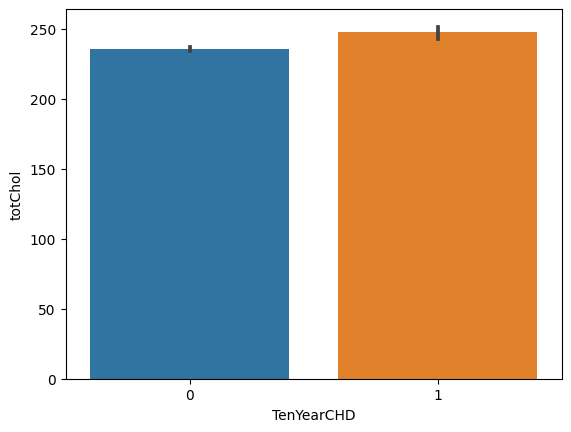

In [44]:
sns.barplot(x=df['TenYearCHD'], y=df['totChol'])

##### 1. Why did you pick the specific chart?

To understand effect of total cholesterol on CHD, we choose barplot as totChol is continuous and TenYearCHD is categorical variable.

##### 2. What is/are the insight(s) found from the chart?

From the above plot, we notice that higher level of cholesterol can lead to having risk for CHD.

### 2.8 Effect of sysBP and diaBP on CHD

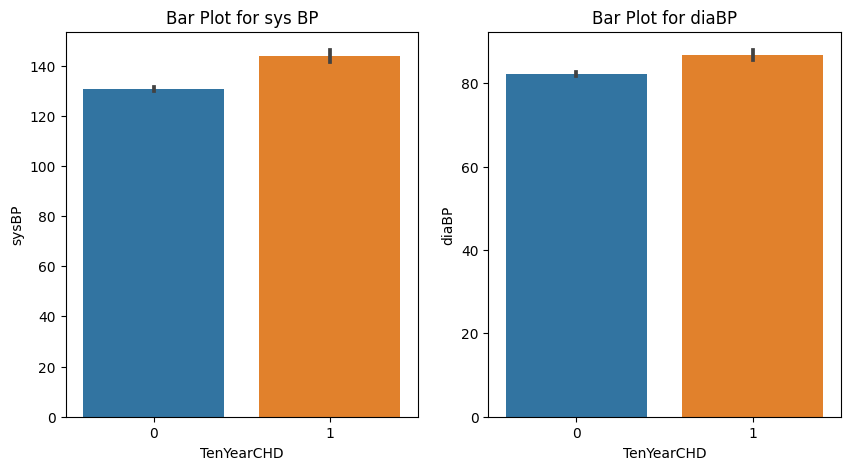

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot 1: Bar plot for sysBP
sns.barplot(x='TenYearCHD', y='sysBP', data=df, ax=axes[0])
axes[0].set_title('Bar Plot for sys BP')

# Plot 2: Bar plot for diaBP
sns.barplot(x='TenYearCHD', y='diaBP', data=df, ax=axes[1])
axes[1].set_title('Bar Plot for diaBP')


# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

To understand the effect of sysBP and diaBP on CHD, we choose barplots as we have both continuous and categorical variables.

##### 2. What is/are the insight(s) found from the chart?

From the above plots, we observe that sysBP above 130 and diaBP above 80 can lead to having a risk for CHD.

### Chart - 18 - Pair Plot

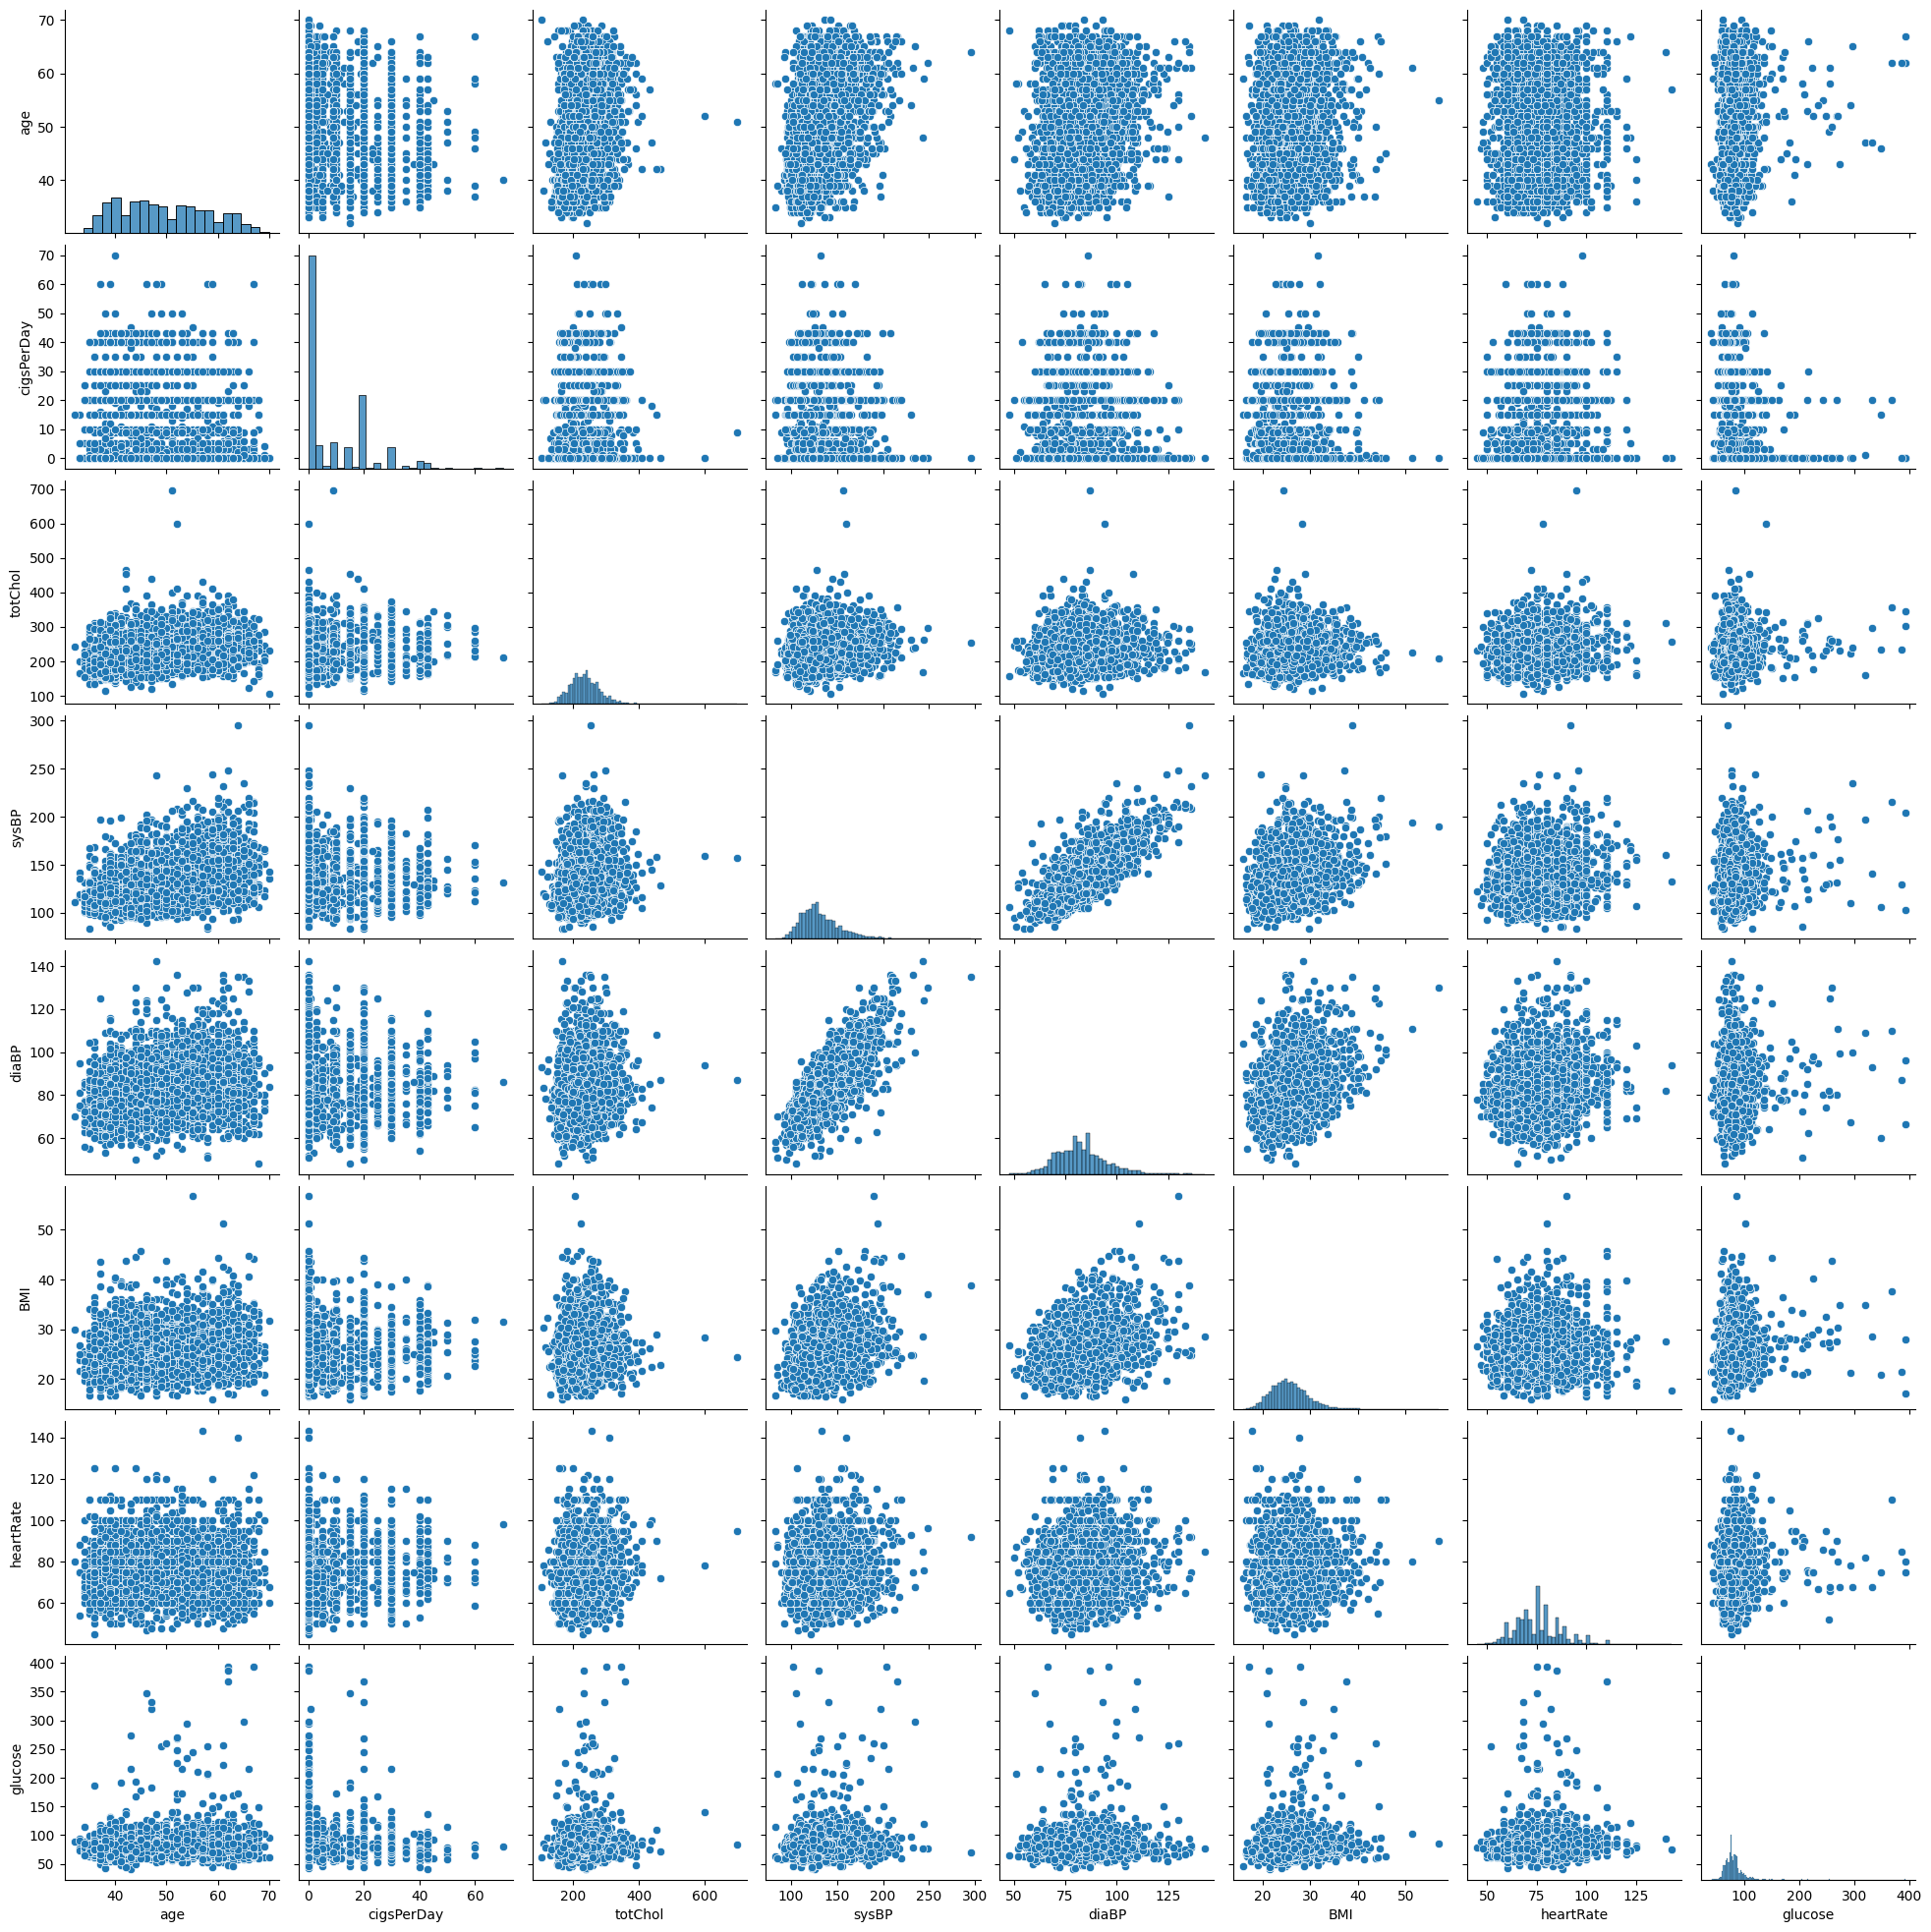

In [46]:
# Pair Plot visualization code
Continuous_variables = ['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']
sns.pairplot(df[Continuous_variables])
plt.show()

##### 1. Why did you pick the specific chart?

To understand the relation among numerical variables, we choose pair plot so that it gives us the all possible pair plots.

##### 2. What is/are the insight(s) found from the chart?

From the above plot, we observe that
* sysBP and diaBP are linearly related.
* sysBP and BMI seems to have a positive relationship.
* diaBP and BMI also have a positive relationship.

### Chart - 19 - Correlation Heatmap

<ipython-input-47-9378ae630a48>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


<Axes: >

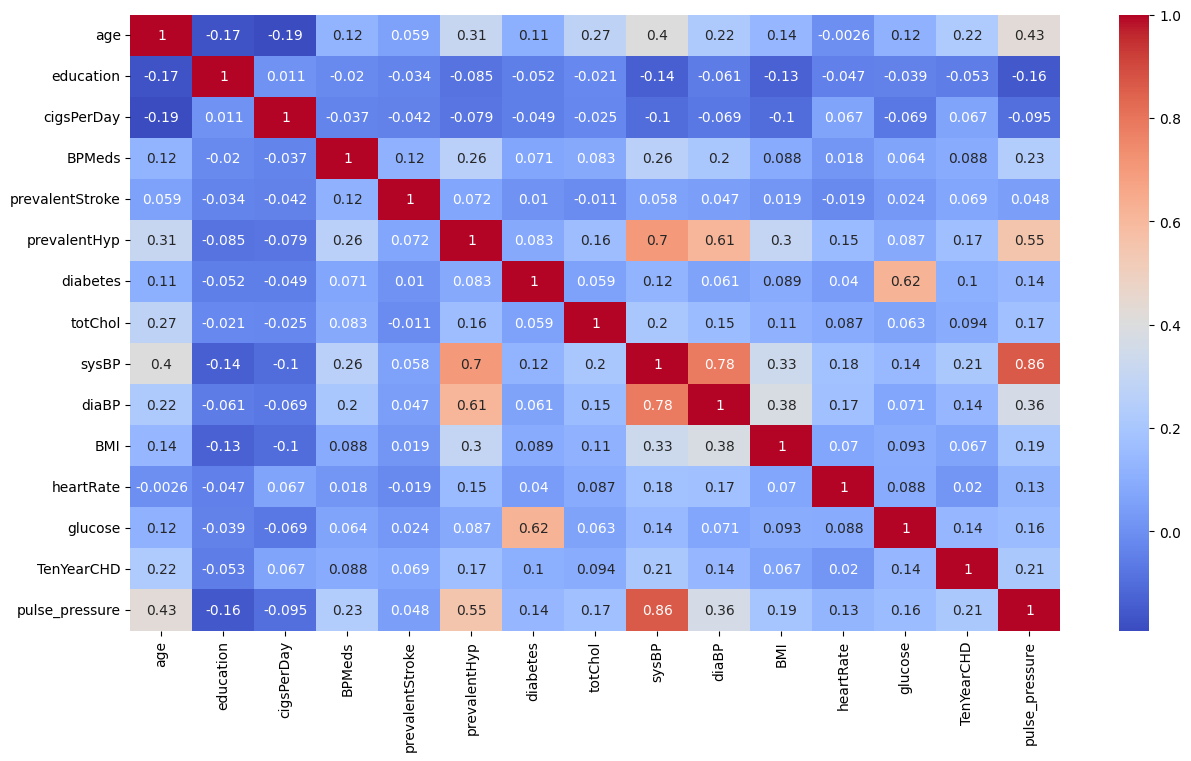

In [47]:
# Correlation Heatmap visualization code
fig = plt.figure(figsize=(15, 8))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')

##### 1. Why did you pick the specific chart?

Heatmap helps us visualize the correlation among the variables. It also gives us the correlation value.

##### 2. What is/are the insight(s) found from the chart?

From heatmap, we see the following observations
* Since pulse pressure is extracted from sysBP and diaBP, they are strongly correlated with pulse pressure. Hence they can be removed from the dataset.
* prevalent hyp and sysBP are correlated (0.7).
* prevalent hyp and diaBP are correlated (0.61).
* diabetes and glusose are correlated (0.62).
* sysBP and diaBP are mutually correlated (0.78).
* Therefore, prevalent hyp and diabetes can be dropped from the dataset while model building.

## ***6. Feature Engineering & Data Pre-processing***

Making sure that the original dataset is not lost, we are copying the dataset to new variable as it undergoes multiple modifications.

In [48]:
df_new = df.copy()

### 1. Handling Missing Values - Here we treat missing values using different techniques depending on the type of variable and number of missing values.

In [49]:
# Handling Missing Values & Missing Value Imputation
df_new.isnull().sum()
# education
df_new['education'] = df_new['education'].fillna(df_new['education'].mode()[0])
# BPMeds
df_new['BPMeds'] = df_new['BPMeds'].fillna(df_new['BPMeds'].mode()[0])
# cigsperday
df_new['cigsPerDay'] = df_new['cigsPerDay'].fillna(df_new['cigsPerDay'].median())
# totChol
df_new['totChol'] = df_new['totChol'].fillna(df_new['totChol'].median())
# bmi
df_new['BMI'] = df_new['BMI'].fillna(df_new['BMI'].median())
# heartrate
df_new['heartRate'] = df_new['heartRate'].fillna(df_new['heartRate'].median())


In [50]:
df_new.head()
df_new.drop(['sex', 'is_smoking'], axis=1, inplace =True)

To apply KNN imputation for glucose we need to make the dataset of numerical type, so we removed sex, and is_smoking at this instance. Once, the imputation is complete they are added to the dataset.

In [51]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)

# Fit the imputer to the data
imputer.fit(df_new)

# Transform the data
df_imputed = imputer.transform(df_new)
df_imputed = pd.DataFrame(df_imputed)
# Save the imputed data
df_imputed.to_csv('imputed_data.csv', index=False)

In [52]:
df_imputed.rename(columns = {0:'age', 1:'education', 2:'cigsPerDay', 3:'BPMeds',
                             4:'prevalentStroke', 5:'prevalentHyp', 6:'diabetes',
                             7:'totChol', 8:'sysBP', 9:'diaBP', 10:'BMI',
                             11:'heartRate',12:'glucose', 13:'TenYearCHD',
                             14:'pulse_pressure'},inplace=True)

In [53]:
df_new['glucose'] = df_imputed['glucose']

In [54]:
df_new['sex'] = df['sex']
df_new['is_smoking'] = df['is_smoking']

In [55]:
df_new.isnull().sum()

age                0
education          0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
pulse_pressure     0
sex                0
is_smoking         0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

* Missing values in Education, and BPMeds variables are imputed with mode as they are categorical.
* Median value is imputed for cigsPerDay, totChol, BMI, and heartRate as they are numerical and positively skewed.
* For glucose we use KNN imputer as it has 304 missing values. If these are replaced by median, then the variable would be biased. Therefore, we choose KNN imputer.

### 2. Multicollinearity - It occurs when independent variables are correlated, which cause problems when we fit the model and predict the results.Hence, it is removed using variance infaltion factor or with the help of heatmap.

In [56]:
df_new.head()

age  education  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  \
0   64        2.0         3.0     0.0                0             0   
1   36        4.0         0.0     0.0                0             1   
2   46        1.0        10.0     0.0                0             0   
3   50        1.0        20.0     0.0                0             1   
4   64        1.0        30.0     0.0                0             0   

   diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  TenYearCHD  \
0         0    221.0  148.0   85.0  25.38       90.0     80.0           1   
1         0    212.0  168.0   98.0  29.77       72.0     75.0           0   
2         0    250.0  116.0   71.0  20.35       88.0     94.0           0   
3         0    233.0  158.0   88.0  28.26       68.0     94.0           1   
4         0    241.0  136.5   85.0  26.42       70.0     77.0           0   

   pulse_pressure sex is_smoking  
0            63.0   F        YES  
1            70.0   M         NO  
2            45.0   F        YES  
3            70.0   M        YES  
4            51.5   F        YES

In [57]:
df_new.drop(['sysBP', 'diaBP'], axis=1, inplace=True) #dropping sysBP and diaBP as mentioned above

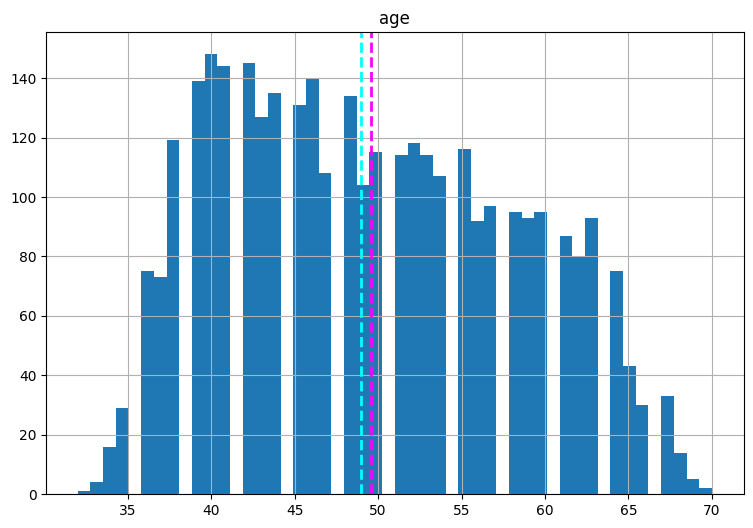

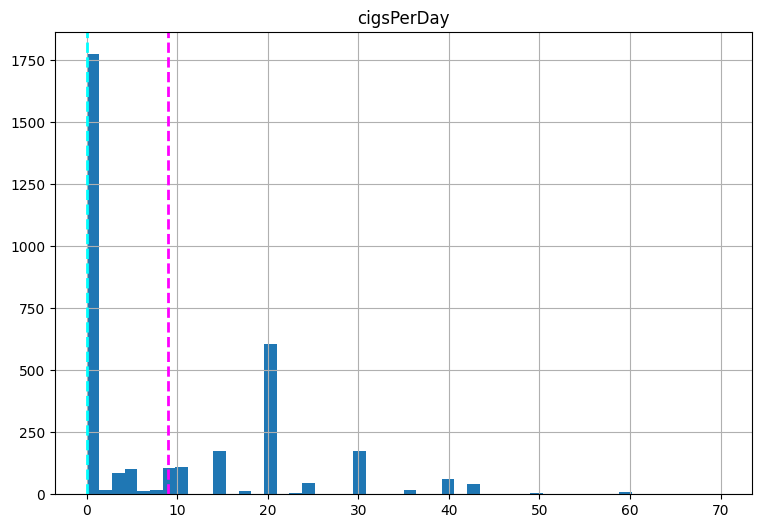

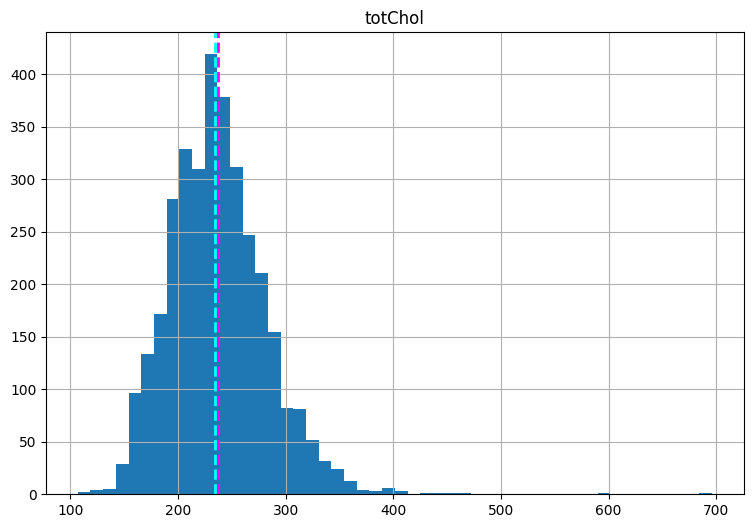

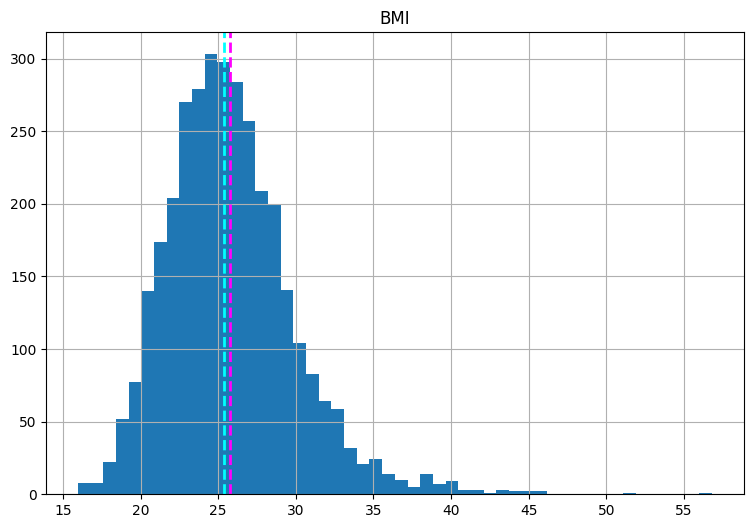

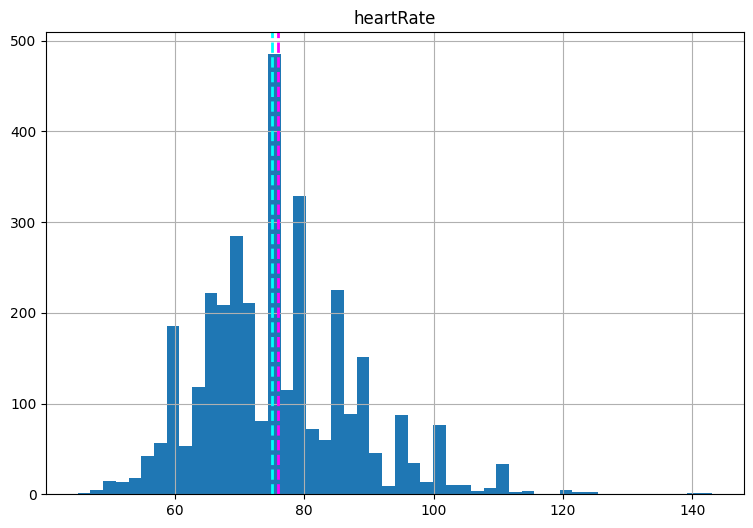

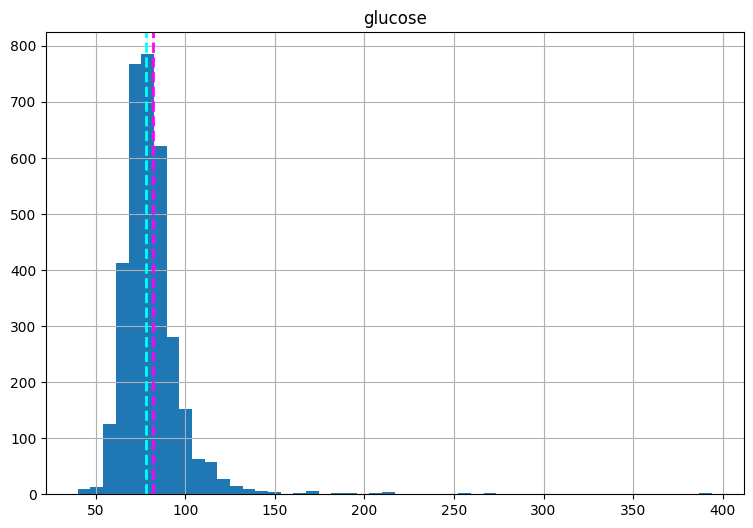

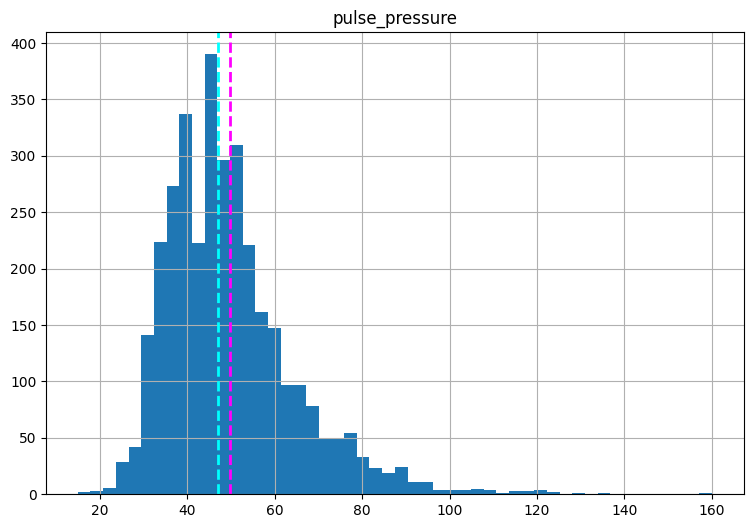

In [58]:
# Plot the histplot distributions of all the independent variables

Numeric_variables = ['age', 'cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose', 'pulse_pressure']
for i in Numeric_variables:

  #figure size
  fig = plt.figure(figsize=(9, 6))

  #gca -> get current axis
  ax = fig.gca()

  #accessing each numeric variable
  feature = df_new[i]

  #plotting histogram
  feature.hist(bins = 50, ax = ax) # bins are intervals

  #Mean of the variable is plotted
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)  #axvline is for vertical line

  #Median of the variable is plotted
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)

  #displays the title
  ax.set_title(i)
plt.show()

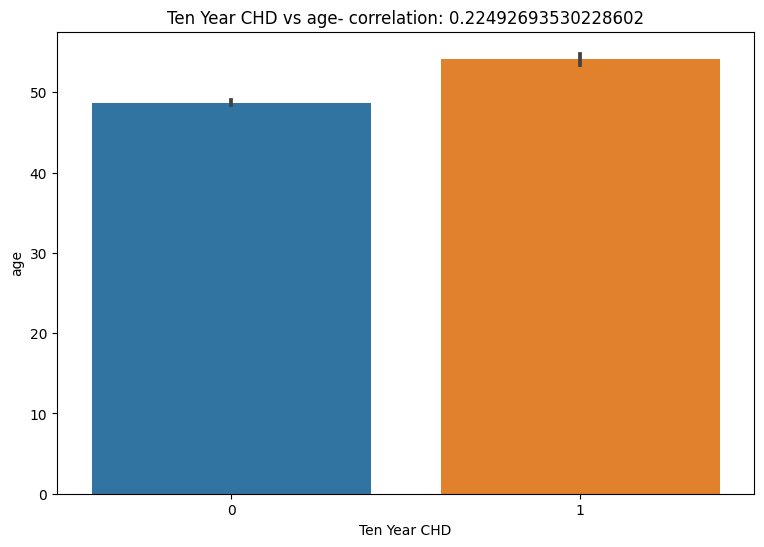

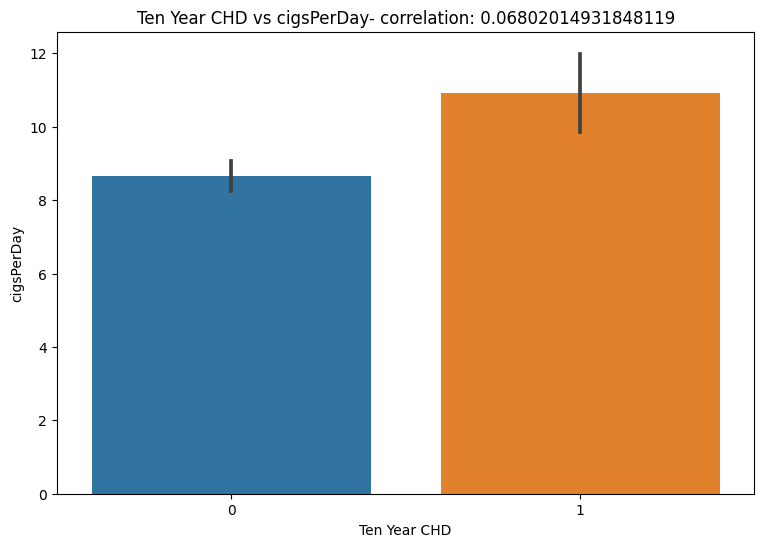

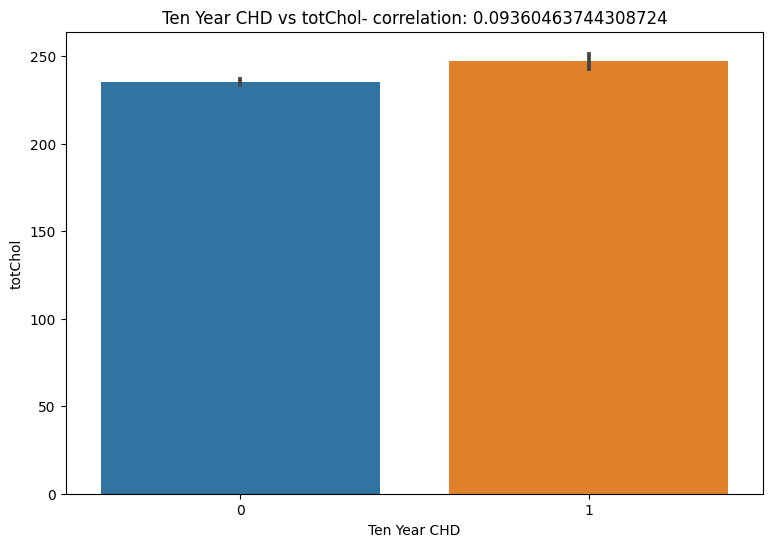

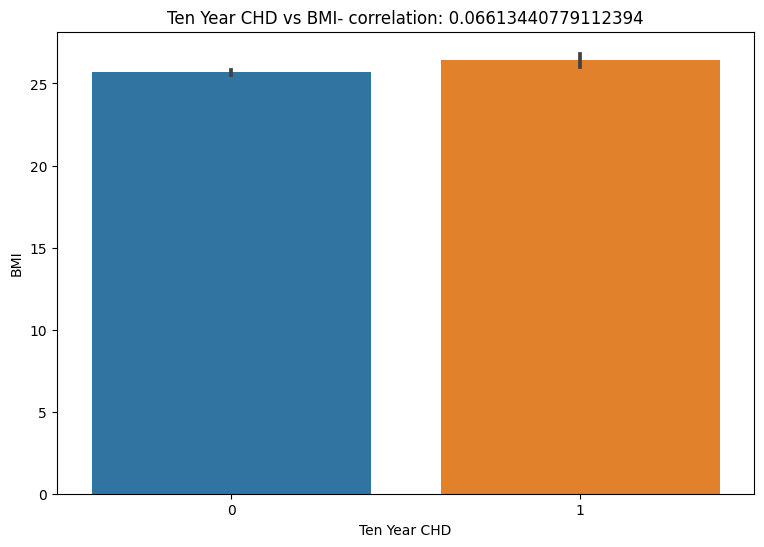

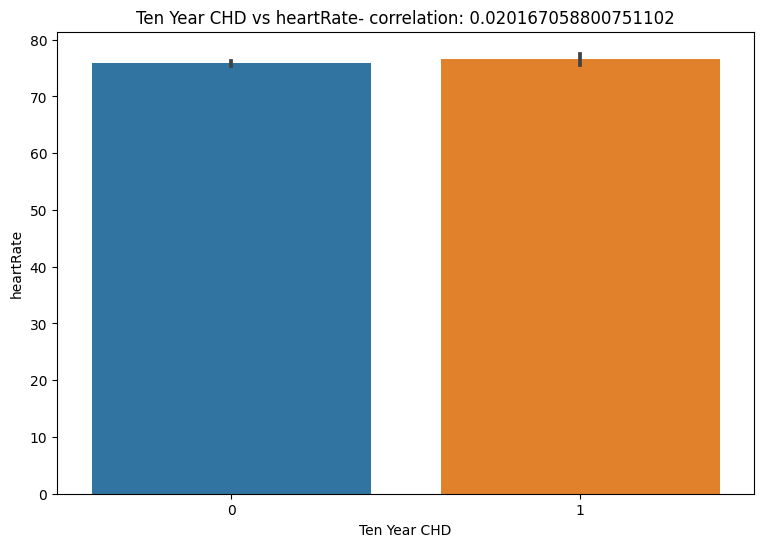

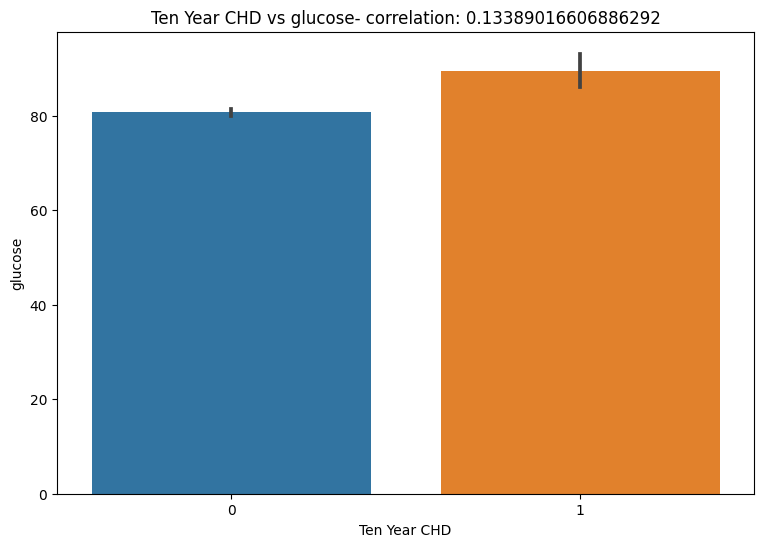

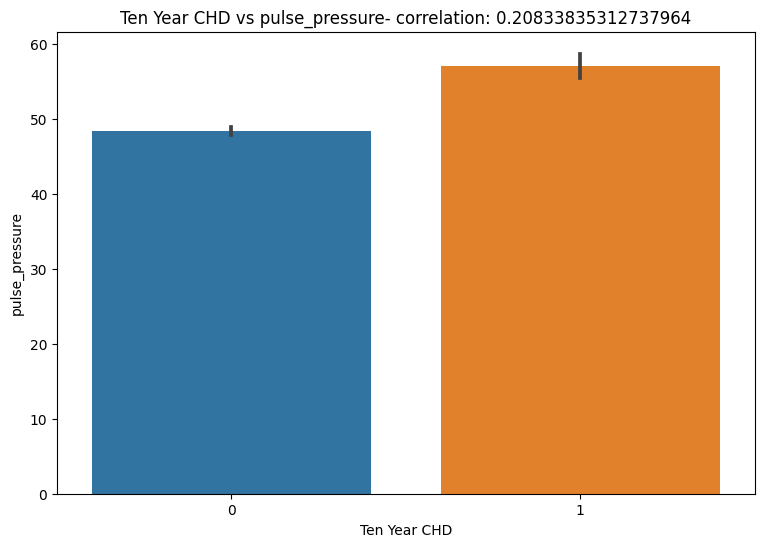

In [59]:
# Plotting the distributions of numerical variables with target variable (TenYearCHD)

for i in Numeric_variables:

    #figure size
    fig = plt.figure(figsize=(9, 6))

    #gca -> get current axis
    ax = fig.gca()

    #assigning numerical variable
    feature = df_new[i]

    #assigning price to a variable
    label = df_new['TenYearCHD']

    #calculating correlation
    correlation = feature.corr(label)

    #plotting scatter plot
    sns.barplot(x=label, y=feature)
    plt.xlabel('Ten Year CHD')
    plt.ylabel(i)
    ax.set_title('Ten Year CHD vs ' + i + '- correlation: ' + str(correlation))


plt.show()

<ipython-input-60-052285c0d817>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df_new.corr()


<Axes: >

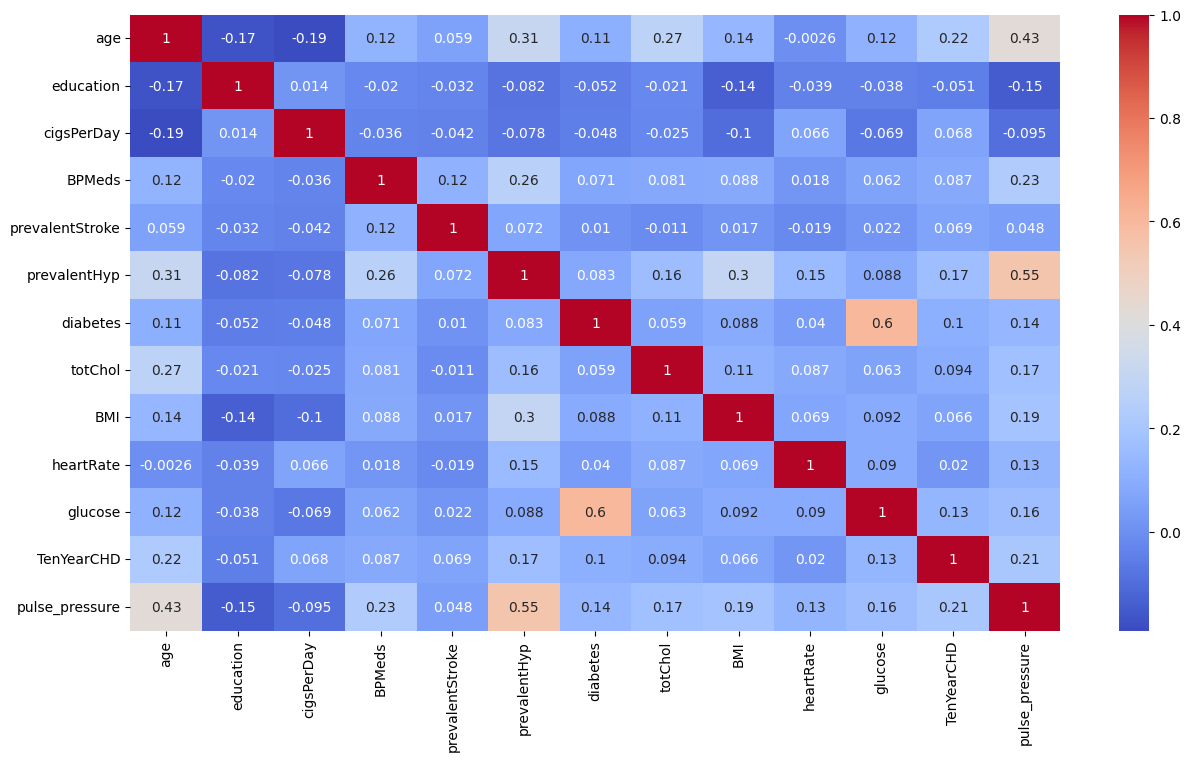

In [60]:
# Plotting heatmap to check correlation among variables.
fig = plt.figure(figsize=(15, 8))
correlation = df_new.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')

From the above heatmap, we conclude that prevalentHYP and diabetes are correlated with pulse pressure and glucose respectively. The variables which have less correlation value are removed. Hence, prevalentHyp and diabetes are dropped from the dataset.

In [61]:
df_new.drop(['prevalentHyp', 'diabetes'],axis=1, inplace=True)

<ipython-input-62-fa48aaf98c3b>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df_new.corr()


<Axes: >

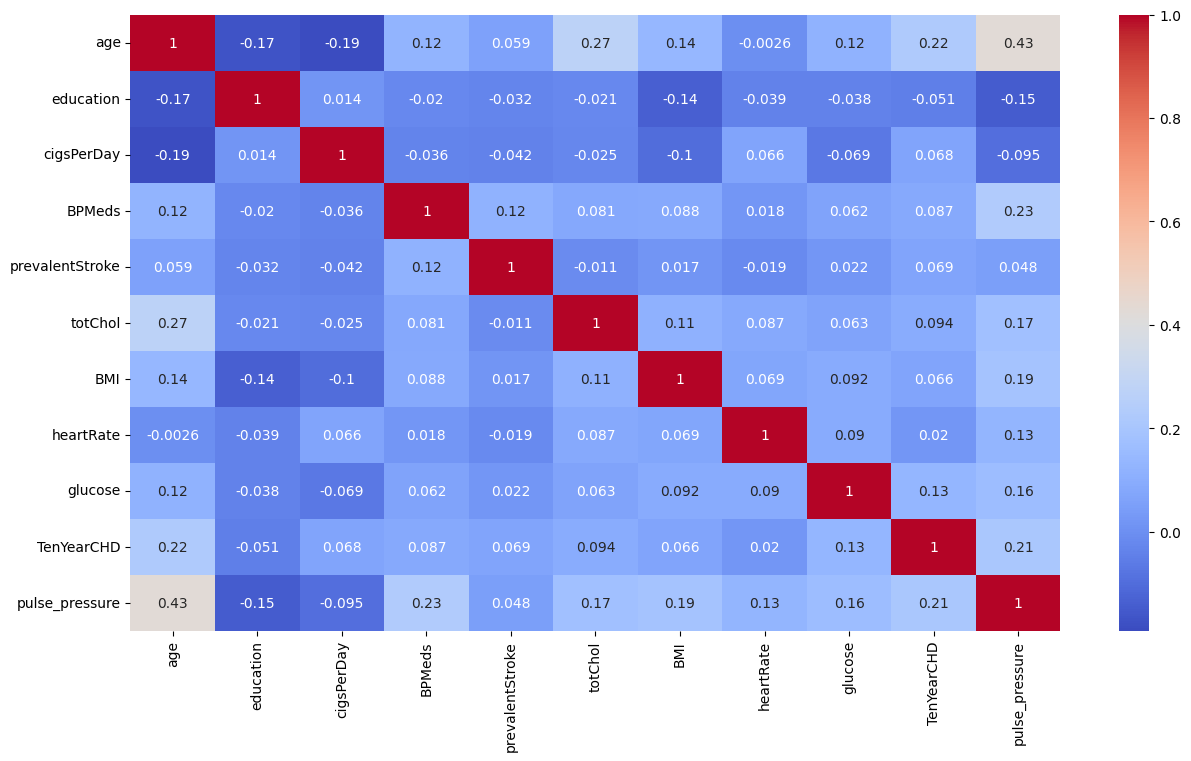

In [62]:
# Plotting heatmap after removing prevalentHyp and diabetes

fig = plt.figure(figsize=(15, 8))
correlation = df_new.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')

### 3. Handling Outliers - The points whichever do not follow the trend are considered to be outliers.

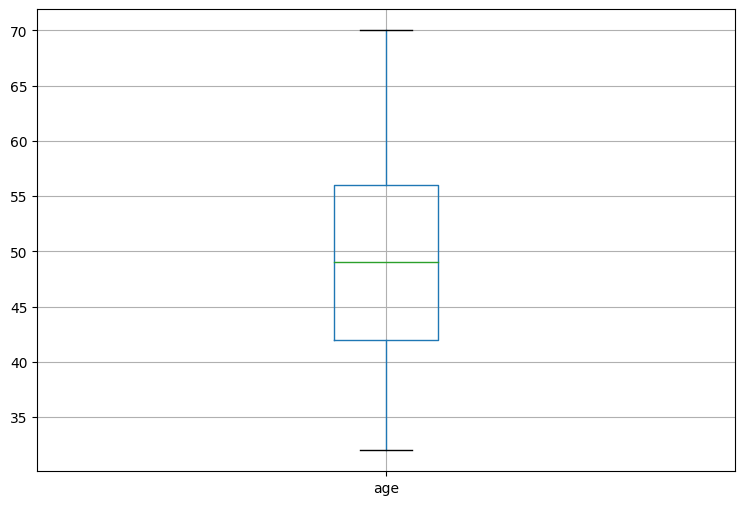

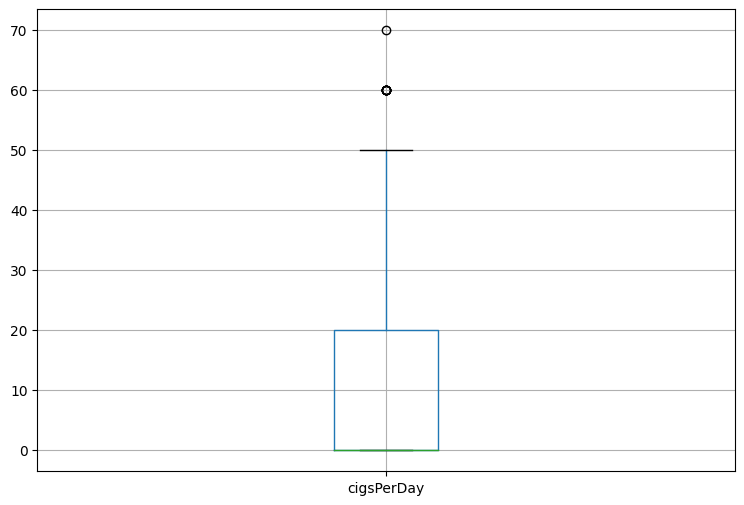

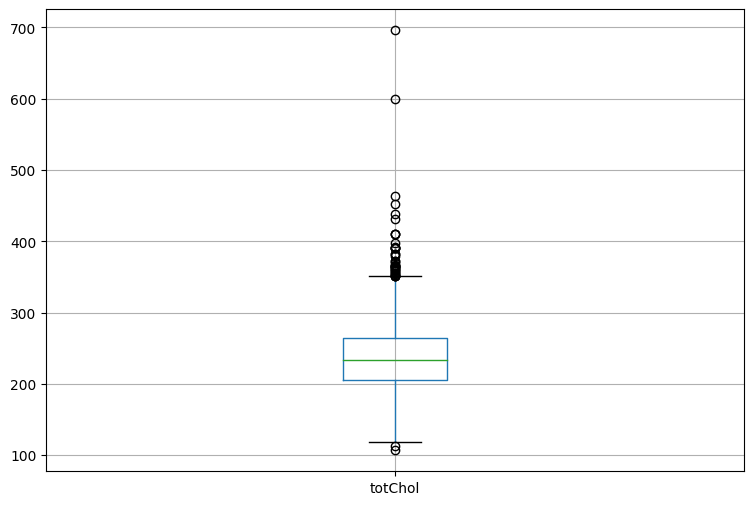

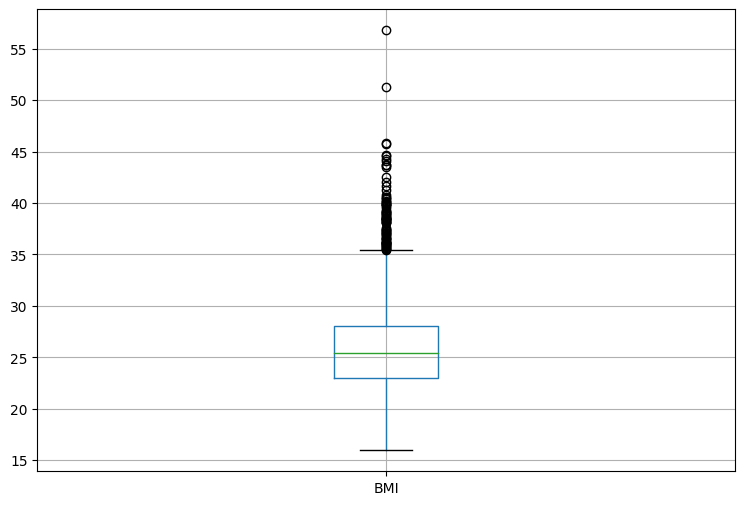

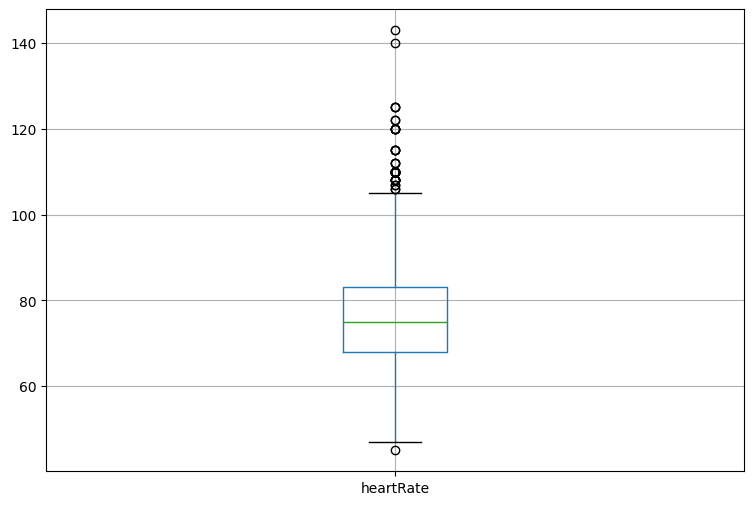

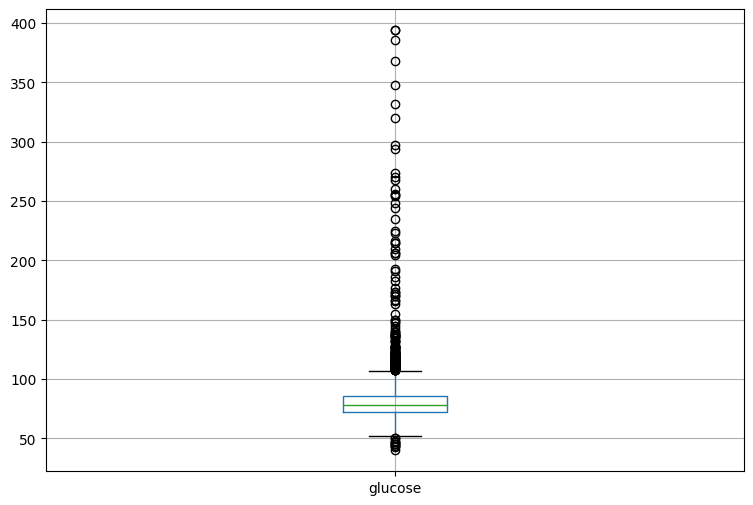

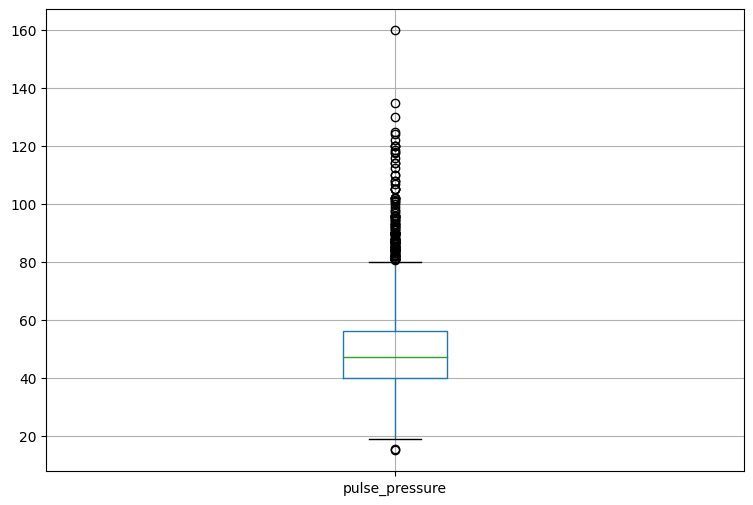

In [63]:
# Handling Outliers & Outlier treatments

# Checking the presence of outliers in numerical variables using box plot
for i in Numeric_variables:
  fig = plt.figure(figsize=(9, 6))

  #gca -> get current axis
  ax = fig.gca()

  #plotting box plot
  df_new.boxplot(column = i, ax = ax)



From above box plots we see that except age every variable is having outliers.

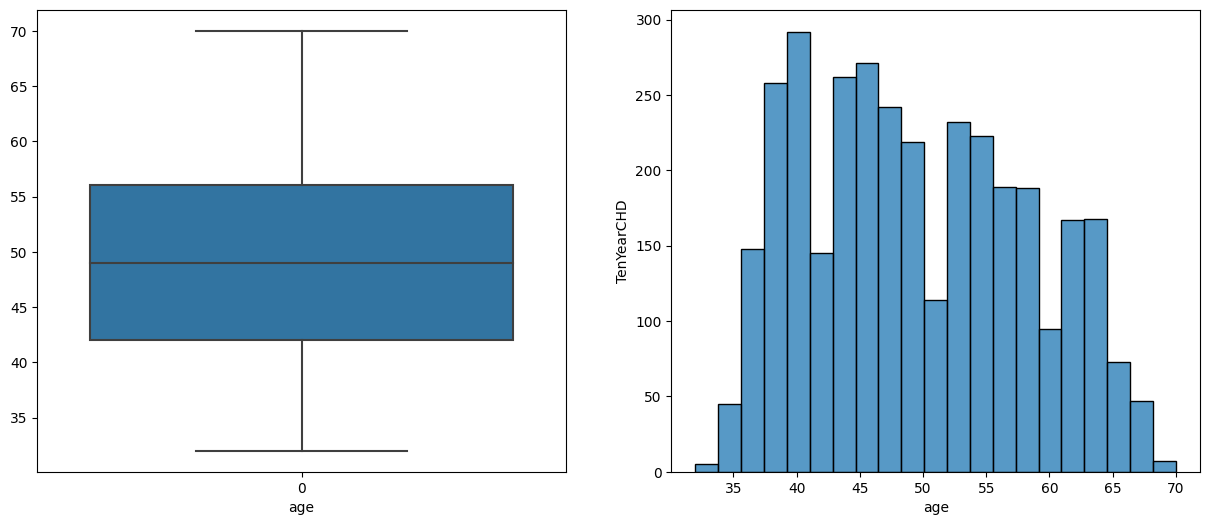

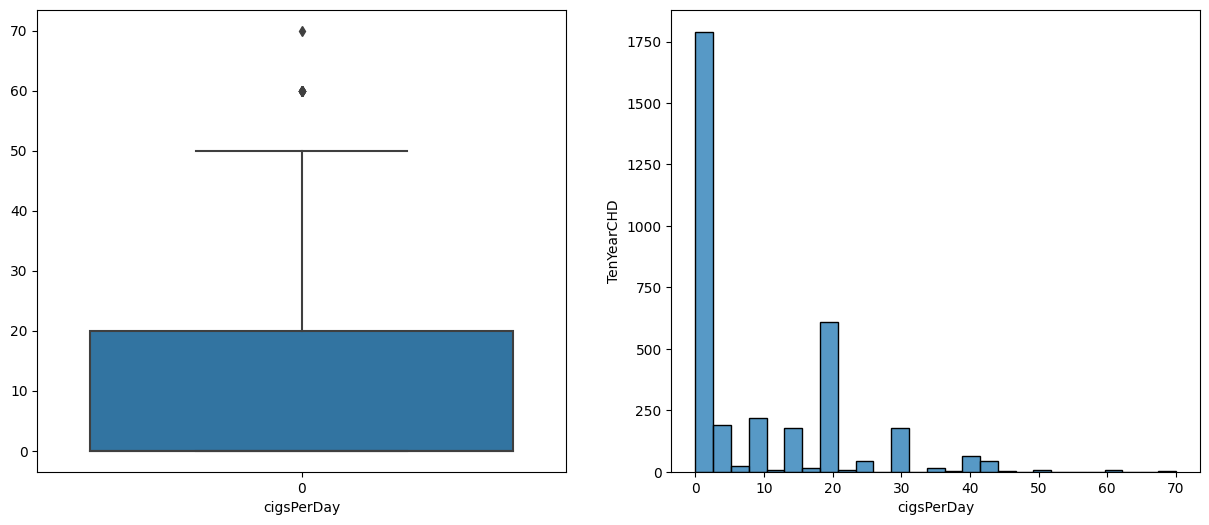

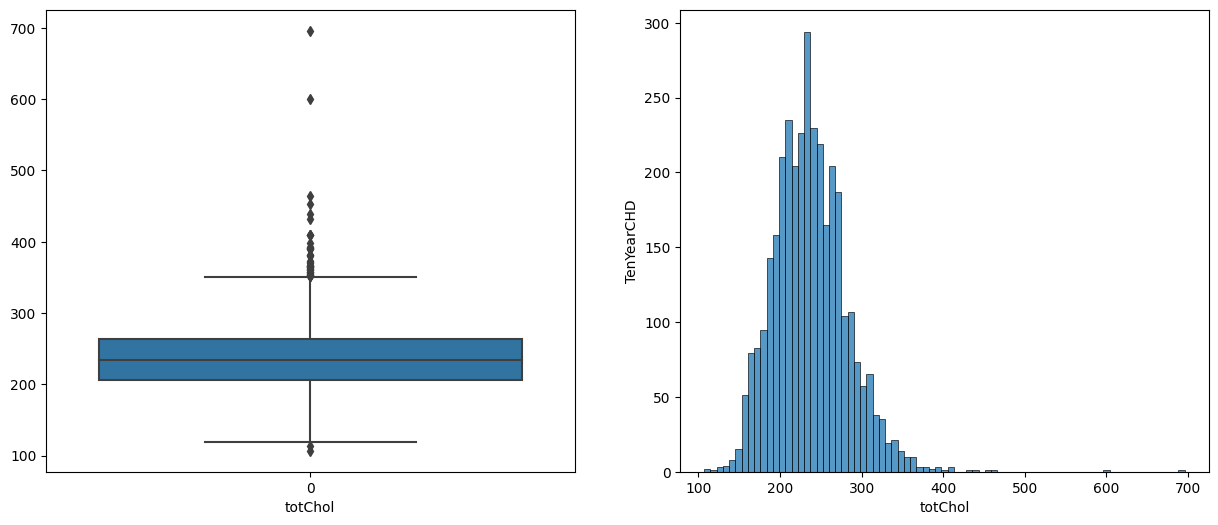

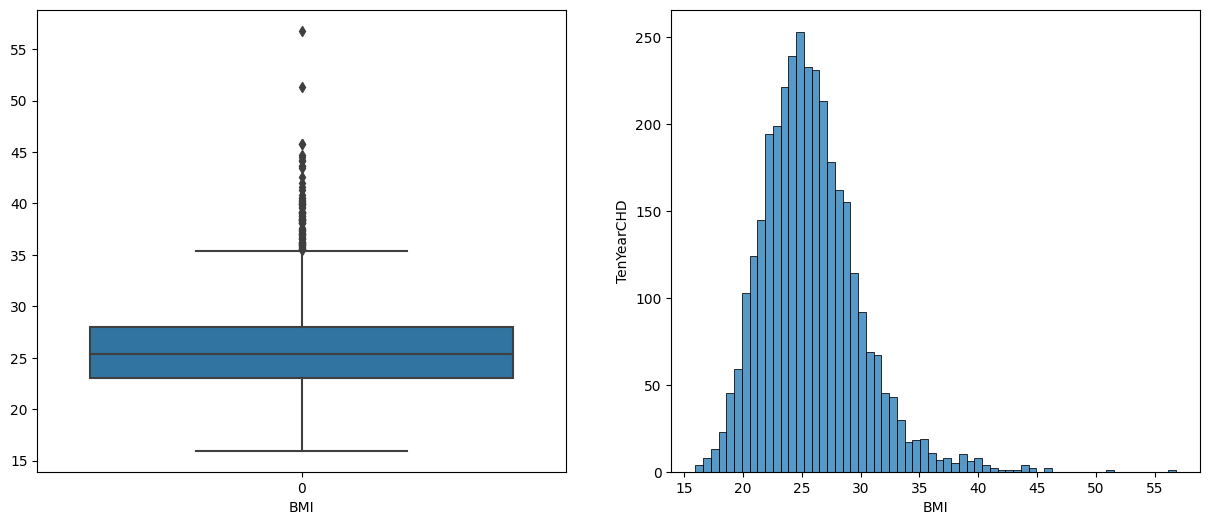

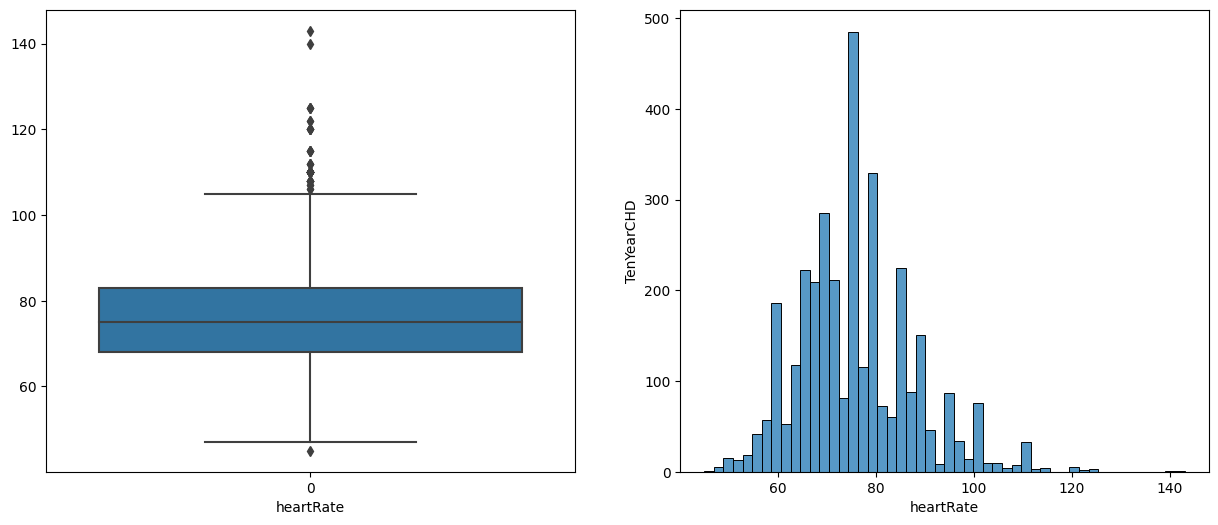

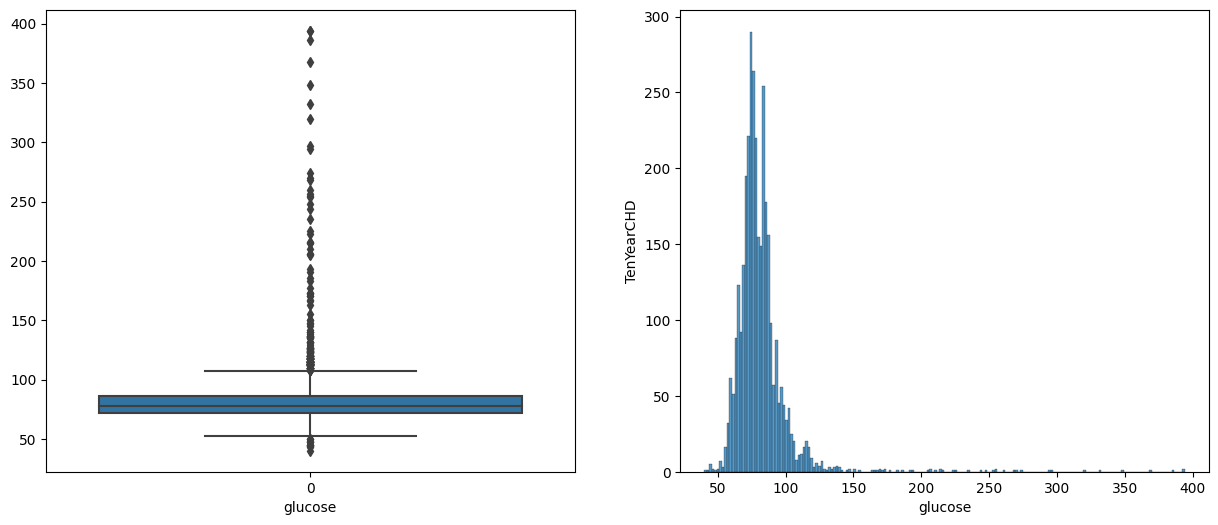

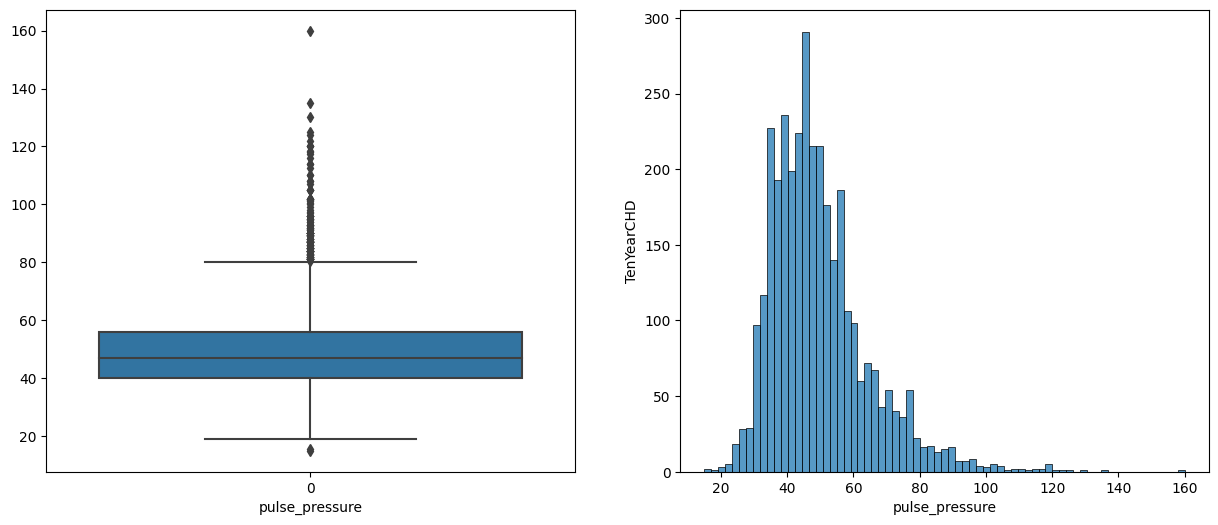

In [64]:
# We check whether all the variables are normally distributed using hist plot
for i in Numeric_variables:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(df_new[i])
    fig.set_xlabel(i)

    plt.subplot(1, 2, 2)
    fig = sns.histplot(df_new[i].dropna())
    fig.set_ylabel('TenYearCHD')
    fig.set_xlabel(i)

    plt.show()


From the above distribution plots we notice that distributions of heartRate and age are nearly normal whereas the other variables are mostly positively skewed.

In [65]:
#Capping the outlier rows with Percentiles

for i in Numeric_variables[1:]:

  upper_lim = df_new[i].quantile(.95)
  lower_lim = df_new[i].quantile(.05)
  df_new.loc[(df_new[i] > upper_lim), i] = upper_lim
  df_new.loc[(df_new[i] < lower_lim), i] = lower_lim


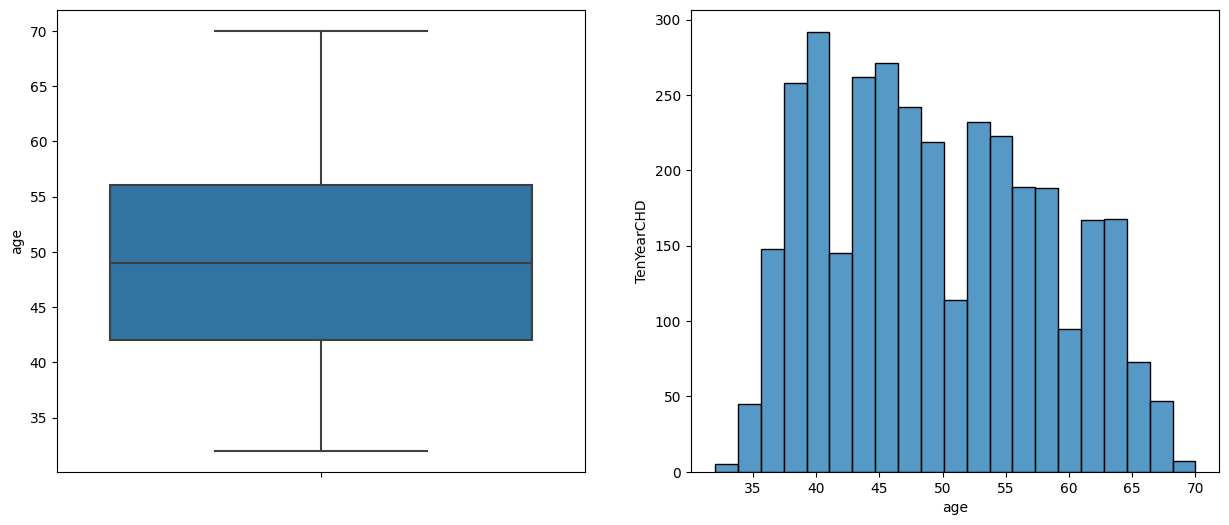

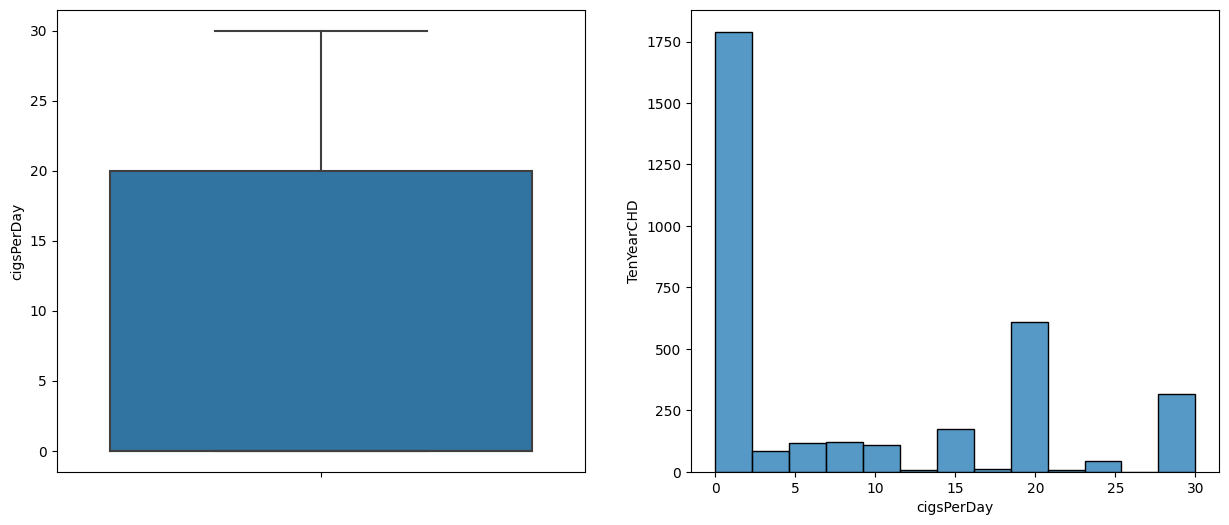

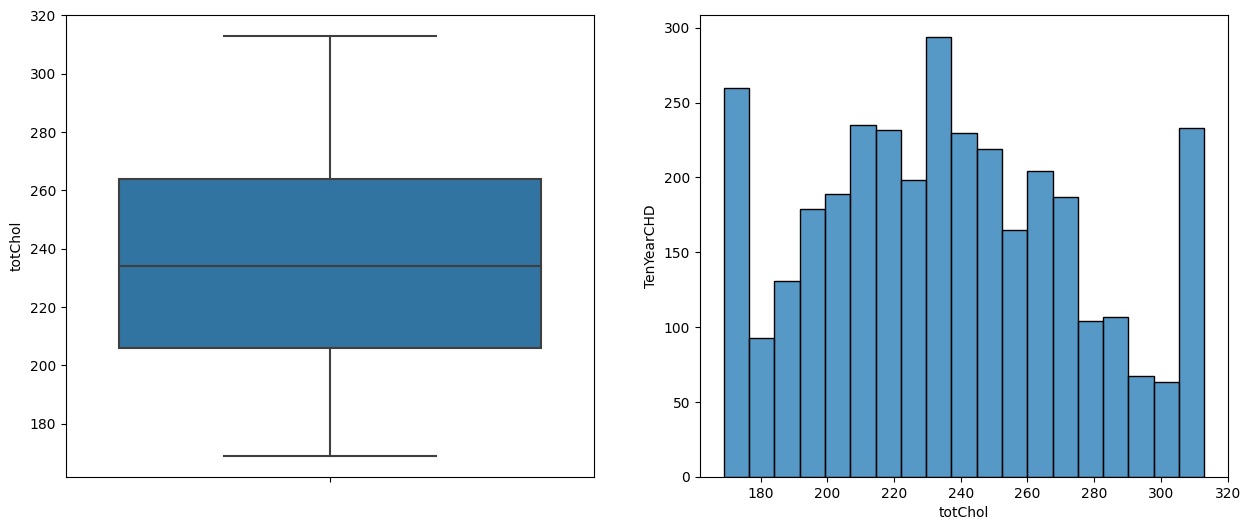

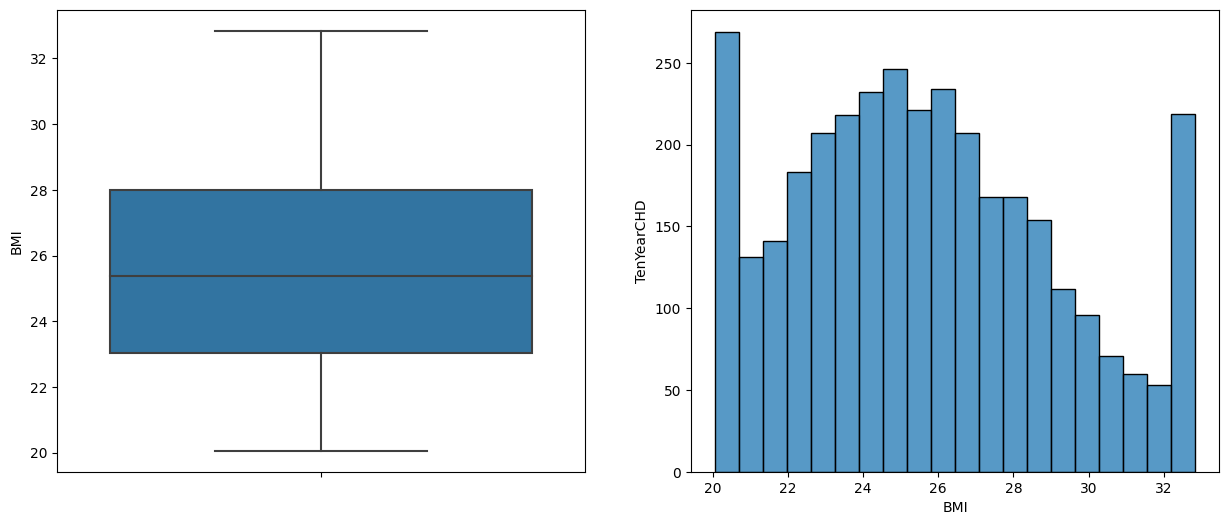

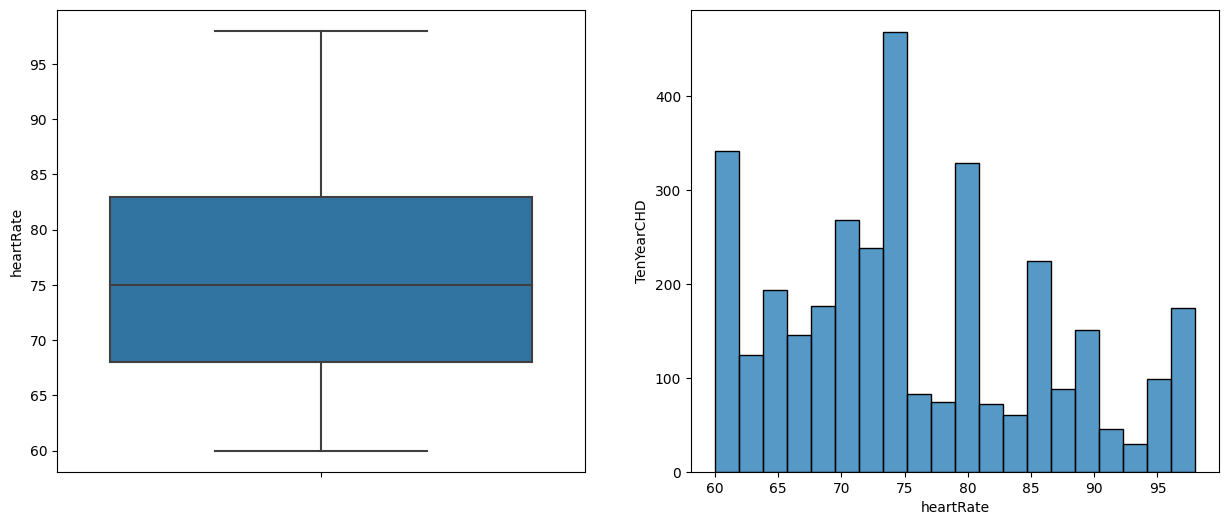

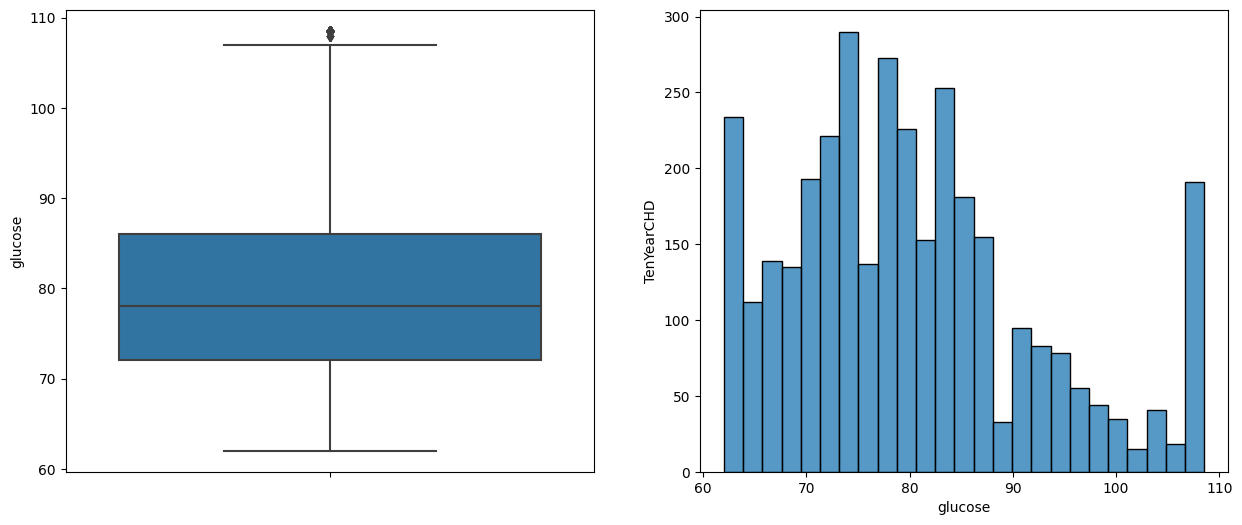

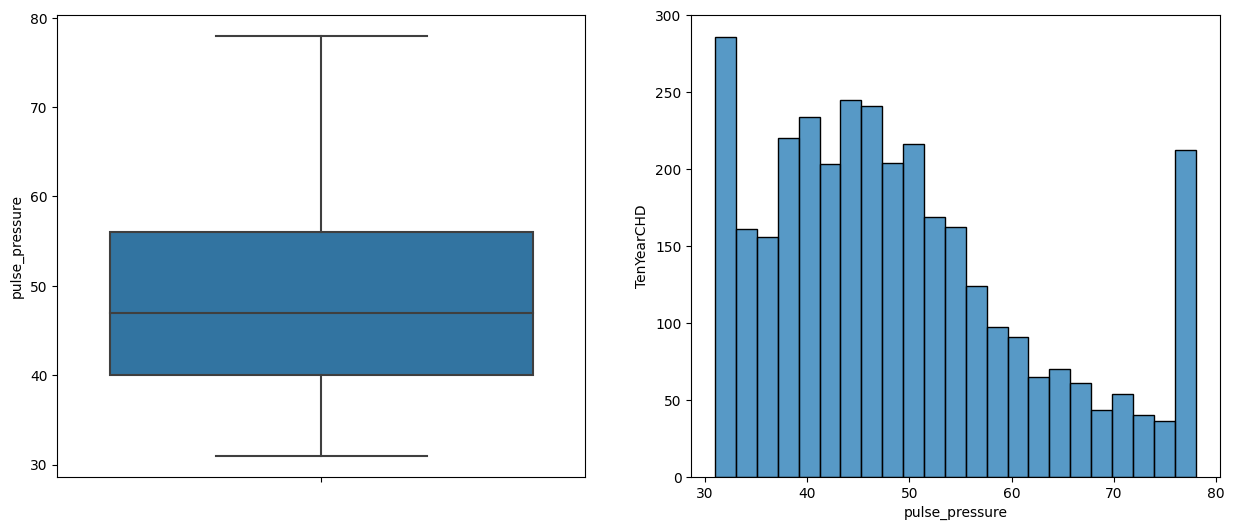

In [66]:
# After capping the outliers we again check for the distributions.
for i in Numeric_variables:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=df_new[i])
    fig.set_title('')
    fig.set_ylabel(i)

    plt.subplot(1, 2, 2)
    fig = sns.histplot(df_new[i].dropna())
    fig.set_ylabel('TenYearCHD')
    fig.set_xlabel(i)


##### What all outlier treatment techniques have you used and why did you use those techniques?

Here we have outliers in cigsPerDay, totChol, BMI, heartRate, glucose, and pulse_pressure. First we calculated 95th and 5th percentile considering them as upper and lower limits of the variable, then we capped the points above upper limit and below lower limits with 95th and 5th percentiles respectively.

### 4. Categorical Encoding - It is the process of converting categorical variables to numerical variables, so that the entire dataset is of numerical type which is the prerequsite for model building.

In [67]:
# Encode your categorical columns
# we are encoding sex and is_smoking variables
df_encode = pd.get_dummies(df_new, columns=['sex','is_smoking'], prefix = ['sex', 'smoking'])

In [68]:
# First look after performing one hot encoding
df_encode.head()

age  education  cigsPerDay  BPMeds  prevalentStroke  totChol    BMI  \
0   64        2.0         3.0     0.0                0    221.0  25.38   
1   36        4.0         0.0     0.0                0    212.0  29.77   
2   46        1.0        10.0     0.0                0    250.0  20.35   
3   50        1.0        20.0     0.0                0    233.0  28.26   
4   64        1.0        30.0     0.0                0    241.0  26.42   

   heartRate  glucose  TenYearCHD  pulse_pressure  sex_F  sex_M  smoking_NO  \
0       90.0     80.0           1            63.0      1      0           0   
1       72.0     75.0           0            70.0      0      1           1   
2       88.0     94.0           0            45.0      1      0           0   
3       68.0     94.0           1            70.0      0      1           0   
4       70.0     77.0           0            51.5      1      0           0   

   smoking_YES  
0            1  
1            0  
2            1  
3            1  
4            1

<Axes: >

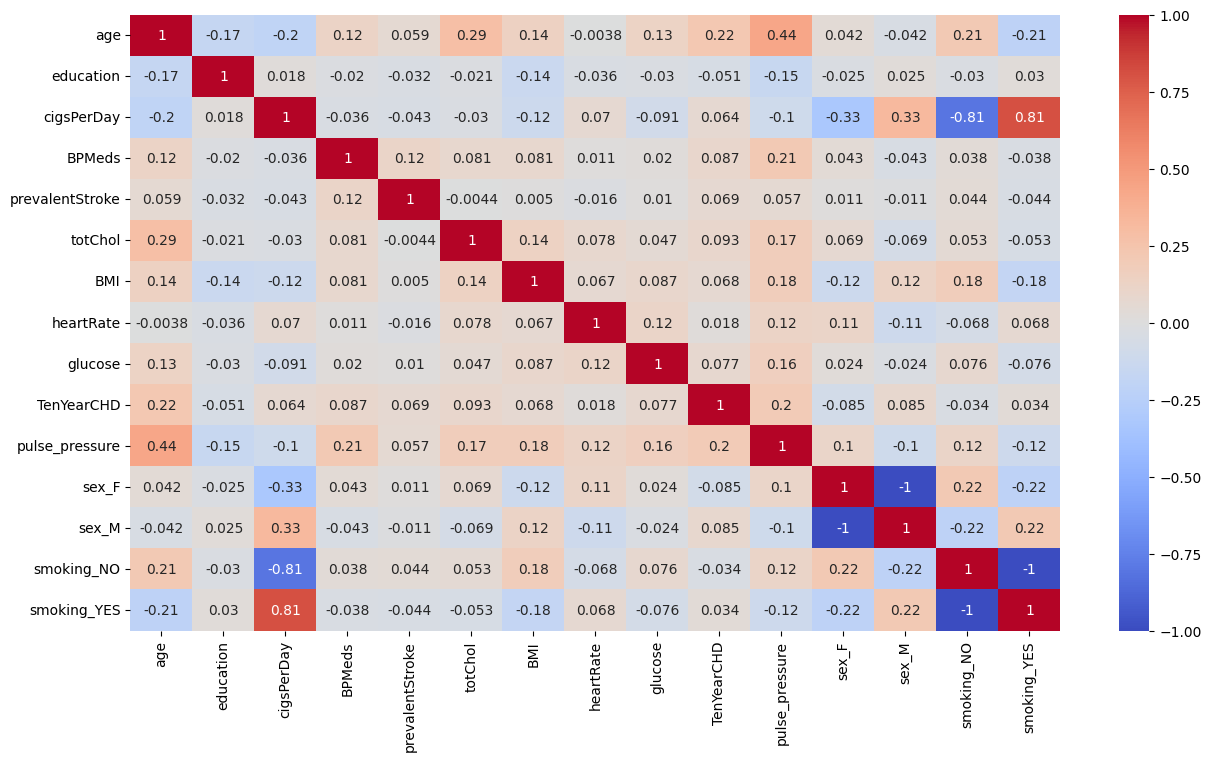

In [69]:
# plotted heatmap to check correlation among variables
fig = plt.figure(figsize = (15,8))
correlation = df_encode.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')

From above heatmap, it is clear that
*  sex_F and sex_M are strongly correlated.
*  cigsPerDay, smoking_NO, and smoking_YES are mutually correlated. Hence, we can drop 2 variables from the dataset.
* Therefore, we drop sex_F, smoking_NO, and smoking_YES.

In [70]:
df_encode.drop(['sex_F', 'smoking_NO', 'smoking_YES'], axis=1, inplace=True)

<Axes: >

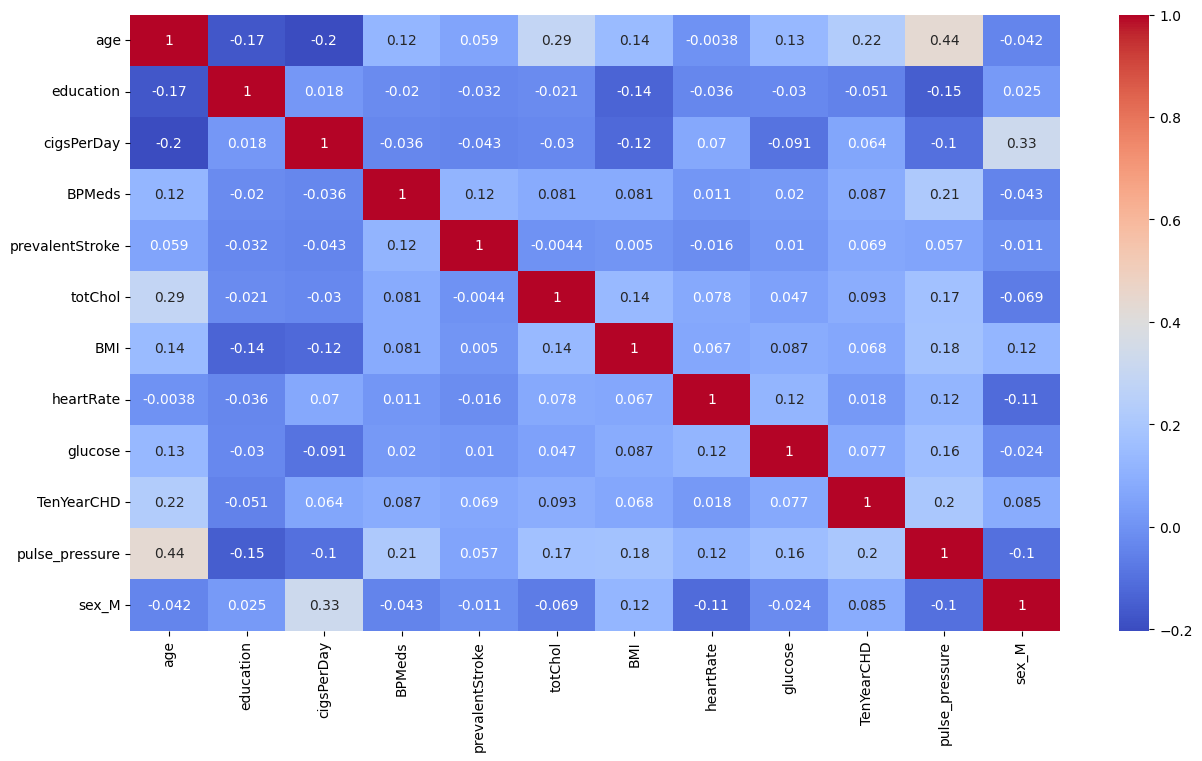

In [71]:
# Now we plot heatmap to know whether there are strongly correlated variables
fig = plt.figure(figsize = (15,8))
correlation = df_encode.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')

#### What all categorical encoding techniques have you used & why did you use those techniques?

From the dataset, we see that sex and is_smoking are the categorical variables. As there are 2 variables to be converted to numerical type, instead of manually assigning integers, we used one hot coding and converted these columns to numerical variables.

### 5. Feature Manipulatio & Selection

#### 1. Feature Manipulation

In [72]:
# Manipulate Features to minimize feature correlation and create new features
# No manipulation is performed here.

#### 2. Feature Selection

In [73]:
# Select your features wisely to avoid overfitting
df_encode.head()
features = ['age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'totChol', 'BMI', 'heartRate', 'glucose','pulse_pressure', 'sex_M']

##### What all feature selection methods have you used  and why?

Feature selection is done with the help of heatmap using correlation value. We have removed variables in a step by step manner observing the correlation values.

##### Which all features you found important and why?

After checking correlinearity among the other independent variables and with the target variable, we selected age, education, cigsPerDay, BPMeds, prevalentStroke, totCHol, BMI, heartRate, glucose, pulse_pressure, and sex_M.

### 6. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Here transformation is not necessary but to make the distributions look more normal we have performed log transformation for all the features.

In [74]:
# Transform Your data
df_transform = df_encode.copy()
for i in features:
  df_transform[i] = np.log10(df_transform[i]+1)


### 7. Data Splitting

we have assigned features to x variable and target variable to y.

In [75]:
x = df_transform[features]
y = df_transform['TenYearCHD']

In [76]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split
#Splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=0)
print(x_train.shape)
print(x_test.shape)

(2373, 11)
(1017, 11)


##### What data splitting ratio have you used and why?

The data is split into 70 percent training set and 30 percent test set using train test split command.

### 8. Data Scaling

In [77]:
# Scaling your data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

##### Which method have you used to scale you data and why?

Here for normalising we used MinMaxScaler library so that the values are in between 0 and 1 in all the features.

### 9. Handling Imbalanced Dataset

In [78]:
df_transform['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

##### Do you think the dataset is imbalanced? Explain Why.

Here we have imbalanced dataset as the target variable has two categories where 0 has a count of 2879 and 1 is of 511 times. As there is a large difference in the counts we can say that the data is imbalanced.

In [79]:
# Handling Imbalanced Dataset (If needed)
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(x_train, y_train)

print('Original dataset shape', len(y_train))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 2373
Resampled dataset shape 4034


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

For treating data imbalance, we used SMOTE (Synthetic Minority Oversampling Technique) to balance the dataset. It works by randomnly picking point from the minority class and computing the k-nearest neighbors for this point, this way new points are generayted. As the data is important for us so we have opted for SMOTE.


## ***7. ML Model Implementation***

In [80]:
def evaluation_metrics(y_train, y_train_predict, y_test, y_test_predict):
  recall_train = recall_score(y_train, y_train_predict)
  recall_test = recall_score(y_test, y_test_predict)
  print('The recall score of train is', recall_train)
  print('The recall score of test is', recall_test)
  labels = ['0', '1']
  cm = confusion_matrix(y_test, y_test_predict)
  print(cm)

  ax= plt.subplot()
  sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

  # labels, title and ticks
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')
  ax.set_title('Confusion Matrix for test data')
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels)


### ML Model - 1. Decision Tree
*  A decision tree classification is a supervised machine learning algorithm that partitions data into subsets based on feature conditions, creating a tree-like structure to make predictions.



In [81]:
# ML Model - 3 Implementation
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score
dt = DecisionTreeClassifier()

# Fit the Algorithm
dt_clf = dt.fit(x_smote, y_smote)

# Predict on the model
train_dt = dt_clf.predict(x_smote)
test_dt = dt_clf.predict(x_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The recall score of train is 1.0
The recall score of test is 0.2967741935483871
[[666 196]
 [109  46]]


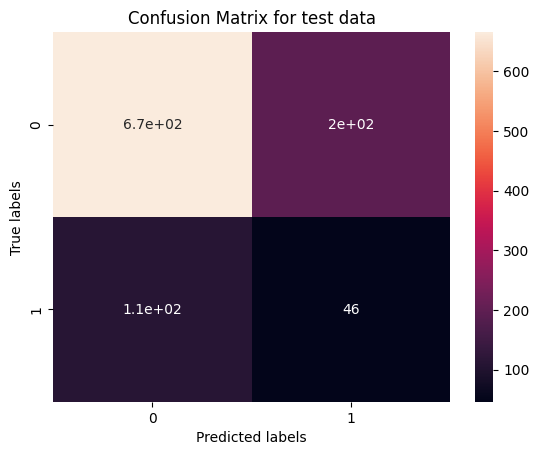

In [82]:
# Visualizing evaluation Metric Score chart
evaluation_metrics(y_smote, train_dt, y_test, test_dt)

When decision tree classification is used to predict the behaviour, it showed recall score as 0.316 and FN as 1.1e+02 for the test dataset which is very low. Hence, the decision tree classification is not suggestable to predict the behaviour of the dataset. Now, we apply cross-validation and check recall score.

#### 2. Cross- Validation & Hyperparameter Tuning

In [83]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

from sklearn.model_selection import GridSearchCV

dt_model = DecisionTreeClassifier()

dt_params = {'max_depth':np.arange(1,10),
             'min_samples_split':np.arange(0.1,1,0.1),
             'min_samples_leaf':np.arange(0.1,0.6,0.1)
             }

dt_gridsearch = GridSearchCV(estimator = dt_model, param_grid = dt_params,
                             cv=5, scoring= 'recall')

# Fit the Algorithm
dt_gridsearch.fit(x_smote,y_smote)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([0.1, 0.2, 0.3, 0.4, 0.5]),
                         'min_samples_split': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
             scoring='recall')

In [84]:
dt_gridsearch.best_estimator_

DecisionTreeClassifier(max_depth=1, min_samples_leaf=0.1, min_samples_split=0.1)

In [85]:
dt_optimal_model = dt_gridsearch.best_estimator_

# Predict on the model
train_dt_cv = dt_optimal_model.predict(x_smote)
test_dt_cv = dt_optimal_model.predict(x_test)

The recall score of train is 0.8383738225086762
The recall score of test is 0.8064516129032258
[[384 478]
 [ 30 125]]


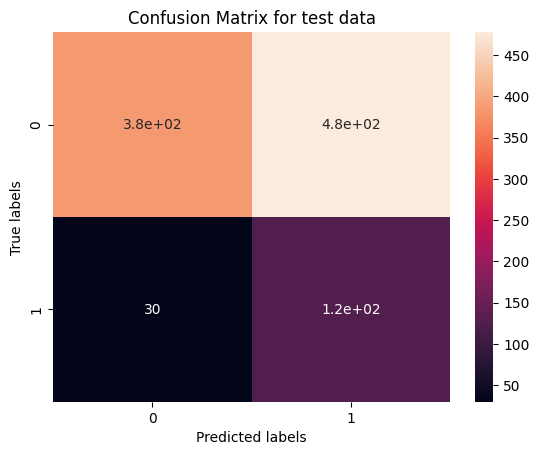

In [86]:
# Visualizing evaluation Metric Score chart
evaluation_metrics(y_smote, train_dt_cv, y_test, test_dt_cv)

#### Which hyperparameter optimization technique have you used and why?

GridSearchCV technique is used for hyperparameter tuning. Here we considered max_depth as np.arange(1,10), min_samples_split as np.arange(0.1,1,0.1), and
min_samples_leaf as np.arange(0.1,0.6,0.1) for the hyperparamters. The optimal values obtained for max_depth, min_sample_split, and min_samples_leaf are 1,0.1,and 0.1 respectively.

#### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After application of optimal hyper parameters, the recall score obtained for test data is 0.806 and FN as 30 which is good enough when compared to decision tree without hyper parameter tuning. We will further see if any model predicts even better than this.

#### Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Having a decision tree with cross validation model which predicts less false negatives and high recall score value is a positive impact on hospitals as the patients get treated for CHD.

### ML Model - 2. Logistic regression
* Logistic regression is a statistical method for binary classification that models the probability of an outcome using the logistic function.

In [87]:
# ML Model - 1 Implementation
from sklearn.linear_model import LogisticRegression

# Fit the Algorithm
log_clf = LogisticRegression().fit(x_smote, y_smote)

# Predict on the model
y_train_predict_log = log_clf.predict(x_smote)
y_test_predict_log = log_clf.predict(x_test)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The recall score of train is 0.7074863658899355
The recall score of test is 0.6516129032258065
[[550 312]
 [ 54 101]]


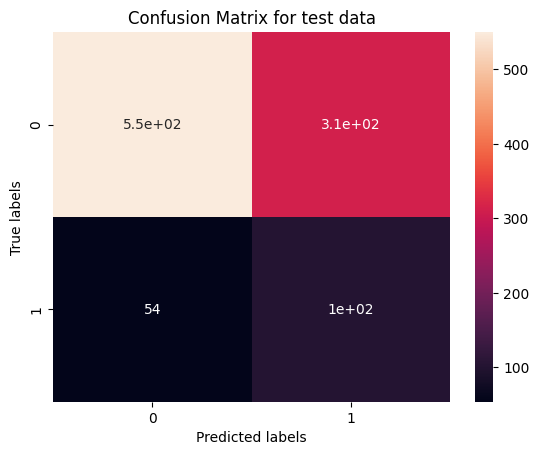

In [88]:
# Visualizing evaluation Metric Score chart
evaluation_metrics(y_smote, y_train_predict_log, y_test, y_test_predict_log)

When logistic regression model is used to predict the risk of CHD, it showed a recall score of 0.645 for test dataset and FN as 55 which is better but decision tree with hyper parameter tuning gave better recall score and FN value than this.

#### 2. Cross- Validation & Hyperparameter Tuning

In [89]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_validate

# Fit the Algorithm
lr = LogisticRegression()
scoring = ['recall']
scores = cross_validate(lr,x_smote, y_smote, scoring = scoring, cv = 5, return_train_score=True, return_estimator=True,verbose = 10)

# Predict on the model

[CV] START .....................................................................
[CV] END .................. recall: (train=0.717, test=0.672) total time=   0.0s
[CV] START .....................................................................
[CV] END .................. recall: (train=0.708, test=0.715) total time=   0.0s
[CV] START .....................................................................
[CV] END .................. recall: (train=0.692, test=0.700) total time=   0.0s
[CV] START .....................................................................
[CV] END .................. recall: (train=0.693, test=0.755) total time=   0.0s
[CV] START .....................................................................
[CV] END .................. recall: (train=0.714, test=0.680) total time=   0.0s


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    0.2s


In [90]:
print(scores['train_recall'])
print(scores['test_recall'])

[0.71685254 0.70755886 0.69249845 0.69311841 0.71437423]
[0.67245658 0.7146402  0.70049505 0.7549505  0.67990074]


#### Which hyperparameter optimization technique have you used and why?

Cross validate hyper parameter tuning is implemented to improve model performance.

#### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

On applying cross validation, we notice that there is little increase in recall score when compared to logistic regression without cross validation.

#### Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Having a model which predicts more false negatives and less recall score is a negative impact on hospitals as the patients dont get treated for the disease when they are actually having a risk for CHD.

### ML Model - 3. Random forest classifier
* A random forest classifier is an ensemble learning method that constructs multiple decision trees during training and output is given by generalization of combining the results of multiple individual decision trees.

In [149]:
# ML Model - 1 Implementation
from sklearn.ensemble import RandomForestClassifier

# Fit the Algorithm
rf_clf = RandomForestClassifier(random_state = 0).fit(x_smote, y_smote)

# Predict on the model
y_train_predict_rf = rf_clf.predict(x_smote)
y_test_predict_rf = rf_clf.predict(x_test)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The recall score of train is 1.0
The recall score of test is 0.23870967741935484
[[766  96]
 [118  37]]


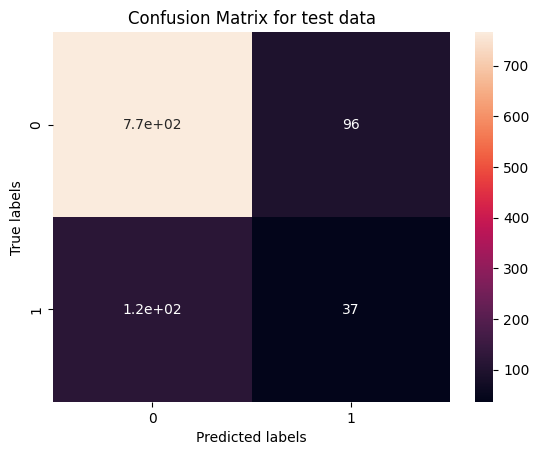

In [150]:
# Visualizing evaluation Metric Score chart
evaluation_metrics(y_smote, y_train_predict_rf, y_test, y_test_predict_rf)

When random forest classifier is used to predict the risk of CHD, it showed a recall score of 0.22 for test data and FN as 1.2e+02 which is not a good prediction. Hence, we try to apply cross validation to get the better recall score.

#### 2. Cross- Validation & Hyperparameter Tuning

In [161]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV

param_dict = {'n_estimators' : [50,80,100],
              'max_depth' : [3,4],
              'min_samples_split' : [50,100,150],
              'min_samples_leaf' : [40,50]}

# Fit the Algorithm
rf_model = RandomForestClassifier(random_state=0)

# Grid search
rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='recall')

rf_grid.fit(x_smote,y_smote)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=3, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.9s
[CV] END max_depth=3, min_sam

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 4], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             scoring='recall', verbose=2)

In [162]:
rf_grid.best_params_

{'max_depth': 3,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 100}

In [163]:
# predict the model
rfc_optimal_model = rf_grid.best_estimator_
train_rf_cv = rfc_optimal_model.predict(x_smote)
test_rf_cv = rfc_optimal_model.predict(x_test)

The recall score of train is 0.7654933068914229
The recall score of test is 0.6258064516129033
[[559 303]
 [ 58  97]]


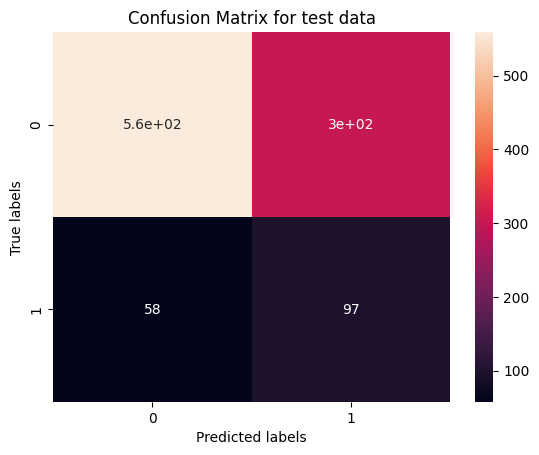

In [164]:
# Visualizing evaluation Metric Score chart
evaluation_metrics(y_smote, train_rf_cv, y_test, test_rf_cv)

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV technique is used for hyperparameter tuning. Here we considered n_estimators as [50,80,100], max_depth as [4,6,8], min_samples_split as [50,100,150], min_samples_leaf as [40,50] for the hyperparamters. The optimal values obtained for n_estimators, max_depth, min_samples_split, and max_samples_leaf are 100, 3, 50, and 40 respectively.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After implementing cross validation for random forest classifier, we notice that recall score is 0.62 and FN as 58 which better than random forest without cross validation but not better than decision tree with cross validation.

#### Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Using random forest classifier with cross validation model which predicts more false negatives and less recall score is a negative impact on hospitals as the patients dont get treated for the disease when they are actually having a risk for CHD.

### ML Model - 4. KNN Classifier
* The k-Nearest Neighbors (KNN) classifier is a simple machine learning algorithm that classifies a data point based on the majority class of its k nearest neighbors in the feature space.

In [97]:
# ML Model - 4 Implementation
from sklearn.neighbors import KNeighborsClassifier
# k = sqrt(4610) -> k = 67.8
neighbors = np.arange(1,68)
recall_train = []
recall_test = []
# Fit the Algorithm
for k in neighbors:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_smote, y_smote)

  # Predict on the model
  train_knn = knn.predict(x_smote)
  test_knn = knn.predict(x_test)
  recall_train_knn = recall_score(y_smote, train_knn)
  recall_test_knn = recall_score(y_test, test_knn)
  recall_train.append(recall_train_knn)
  recall_test.append(recall_test_knn)



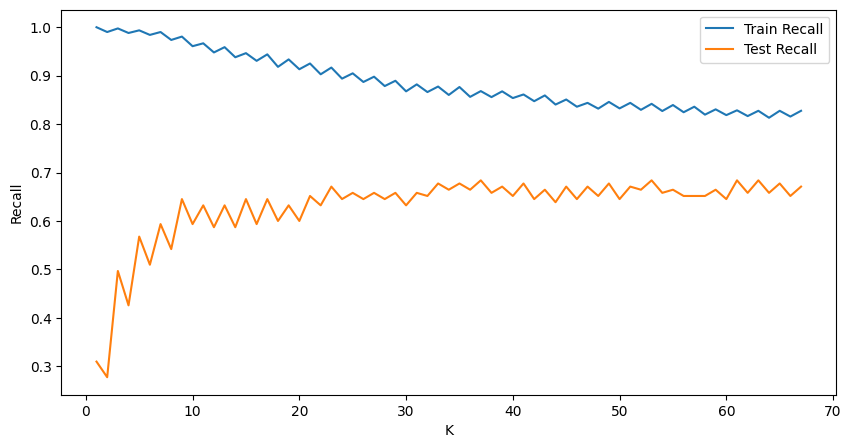

In [98]:
# plotting the recall scores of train and test dataset
plt.figure(figsize=(10,5))
x_ = range(1,68)
y1 = recall_train
y2 = recall_test
plt.plot(x_, y1, label='Train Recall')
plt.plot(x_, y2, label = 'Test Recall')
plt.xlabel('K')
plt.ylabel('Recall')
plt.legend()
plt.show()

In [99]:
best_k = recall_test.index(max(recall_test))+1


In [100]:
best_k

37

In [101]:
knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(x_smote, y_smote)
train_knn_bestk = knn_model.predict(x_smote)
test_knn_bestk = knn_model.predict(x_test)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The recall score of train is 0.8681209717402082
The recall score of test is 0.6838709677419355
[[515 347]
 [ 49 106]]


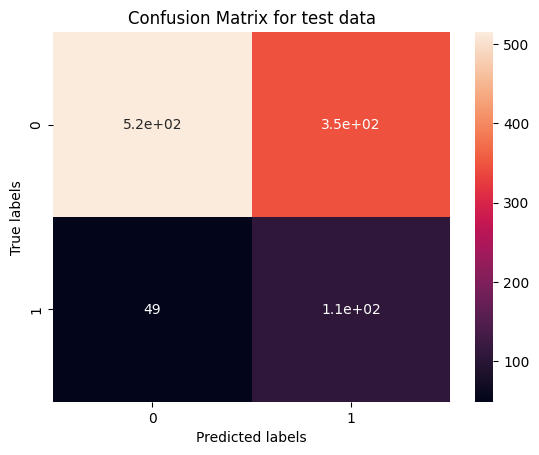

In [102]:
# Visualizing evaluation Metric Score chart
evaluation_metrics(y_smote, train_knn_bestk, y_test, test_knn_bestk)

When KNN classifier with n neighbors as 61 is used for predicting the risk for CHD, we notice that the recall score is 0.65 and FN is 54 which is low. Hence, we try to apply cross validation and check for further improvement.

#### 2. Cross- Validation & Hyperparameter Tuning

In [103]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param_grid = {'n_neighbors':np.arange(1,68)}

# Fit the Algorithm
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5,scoring= 'recall')
knn_cv.fit(x_smote,y_smote)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67])},
             scoring='recall')

In [104]:
knn_cv.best_score_

0.989586762646488

In [105]:
knn_cv.best_params_

{'n_neighbors': 1}

In [106]:
# Predict on the model
knn_optimal = KNeighborsClassifier(n_neighbors=2)
knn_optimal.fit(x_smote, y_smote)

train_knn_cv = knn_optimal.predict(x_smote)
test_knn_cv = knn_optimal.predict(x_test)


The recall score of train is 0.9900842835894893
The recall score of test is 0.27741935483870966
[[722 140]
 [112  43]]


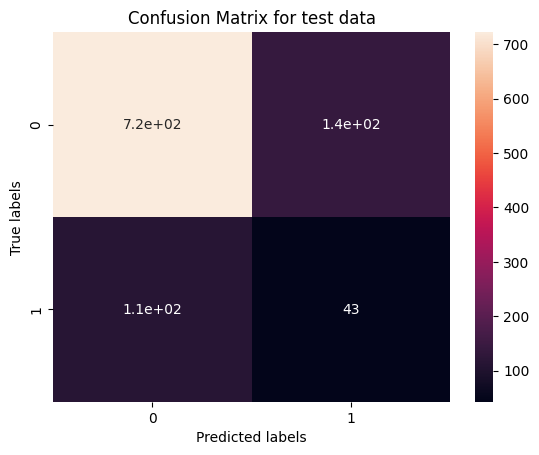

In [107]:
# Visualizing evaluation Metric Score chart
evaluation_metrics(y_smote, train_knn_cv, y_test, test_knn_cv)

#### Which hyperparameter optimization technique have you used and why?

GridSearchCV is used for cross validation by taking n neighbors from 1 to 67. The optimal neighbors obtained is 1. when applied the optimal neighbors we got less recall score and high FN which is not good for predicting.

#### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

No improvement is seen in recall score and FN even after implementing cross validation.

#### Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Using KNN classifier with cross validation model which predicts more false negatives and less recall score is a negative impact on hospitals as the patients dont get treated for the disease when they are actually having a risk for CHD.

### ML Model - 5. SVM
* A Support Vector Machine (SVM) is a powerful supervised machine learning algorithm which works by finding a hyperplane that maximally separates different classes in the feature space, aiming to achieve the widest margin between data points of different categories.

In [108]:
# ML Model - 6 Implementation
from sklearn.svm import SVC
svm = SVC(random_state = 6)

# Fit the Algorithm
svm.fit(x_smote, y_smote)


SVC(random_state=6)

In [109]:
# Predict on the model
train_svm = svm.predict(x_smote)
test_svm = svm.predict(x_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The recall score of train is 0.8130887456618741
The recall score of test is 0.5870967741935483
[[563 299]
 [ 64  91]]


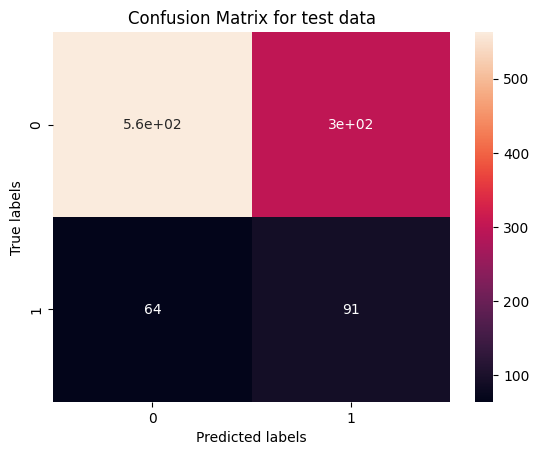

In [110]:
# Visualizing evaluation Metric Score chart
evaluation_metrics(y_smote, train_svm, y_test, test_svm)

When support vector machine model is used for predicting the risk for CHD, we got recall score as 0.58 and FN as 65 for test dataset which is low. We try to apply cross validation to the model to check for further improvement.

#### 2. Cross- Validation & Hyperparameter Tuning

In [111]:
# ML Model - 6 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param_grid_svm = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

svmcv = SVC()
svm_cv = GridSearchCV(svmcv, param_grid_svm, cv=2, scoring= 'recall')

# Fit the Algorithm
svm_cv.fit(x_smote, y_smote)

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             scoring='recall')

In [112]:
# Predict on the model
svm_train_cv = svm_cv.predict(x_smote)
svm_test_cv = svm_cv.predict(x_test)

The recall score of train is 0.9985126425384234
The recall score of test is 0.3096774193548387
[[728 134]
 [107  48]]


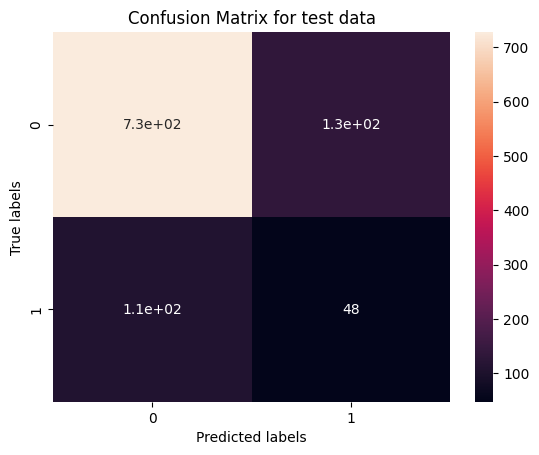

In [113]:
# Visualizing evaluation Metric Score chart
evaluation_metrics(y_smote, svm_train_cv, y_test, svm_test_cv)

#### Which hyperparameter optimization technique have you used and why?

GridSearchCV is used for cross validation by taking C as [0.1, 1, 10, 100, 1000], gamma as [1, 0.1, 0.01, 0.001, 0.0001], and kernel as ['rbf'] which are the hyperparameters. Here, we got least recall score as 0.28 and high FN of 1.1e+02 which is not suitable for predicting risk for CHD.

#### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

No improvement is seen even after applying cross validation.

#### Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Using support vector machine with cross validation model which predicts more false negatives and less recall score is a negative impact on hospitals as the patients dont get treated for the disease when they are actually having a risk for CHD.

### ML Model - 6. Naive bayes classifier
* A Naive Bayes classifier is a probabilistic machine learning algorithm that assumes feature independence and calculates the probability of a class given observed feature values using Bayes' theorem

In [114]:
# ML Model - 7 Implementation
from sklearn.naive_bayes import GaussianNB

# Fit the Algorithm
nbc_model = GaussianNB().fit(x_smote,y_smote)

# Predict on the model
train_pred_nbc = nbc_model.predict(x_smote)
test_preds_nbc = nbc_model.predict(x_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The recall score of train is 0.5017352503718394
The recall score of test is 0.43870967741935485
[[679 183]
 [ 87  68]]


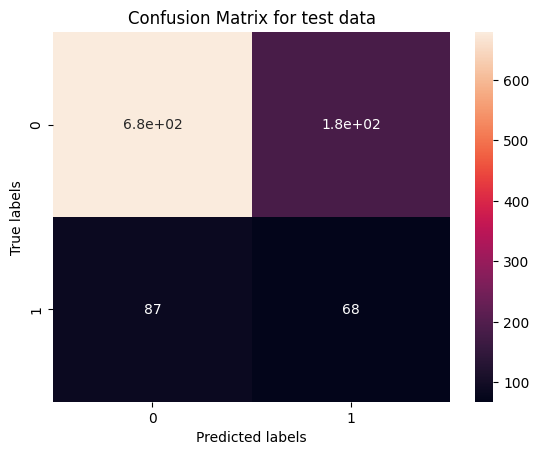

In [115]:
# Visualizing evaluation Metric Score chart
evaluation_metrics(y_smote, train_pred_nbc, y_test, test_preds_nbc)

When naive bayes classifier is used for predicting risk for CHD, we noticed a low recall score of 0.45 and high FN of 84 which is not a better prediction. Hence, we try applying cross validation to see if there is any improvement in recall score.

#### 2. Cross- Validation & Hyperparameter Tuning

In [116]:
# ML Model - 7 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

from sklearn.preprocessing import PowerTransformer

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=nbc_model,
                     param_grid=params_NB,
                     cv=5,
                     verbose=1,
                     scoring='recall')

# Fit the Algorithm
gs_NB.fit(x_smote, y_smote);


Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [117]:
# Predict on the model
train_nbcv = gs_NB.predict(x_smote)
test_nbcv = gs_NB.predict(x_test)

The recall score of train is 0.6802181457610312
The recall score of test is 0.6580645161290323
[[550 312]
 [ 53 102]]


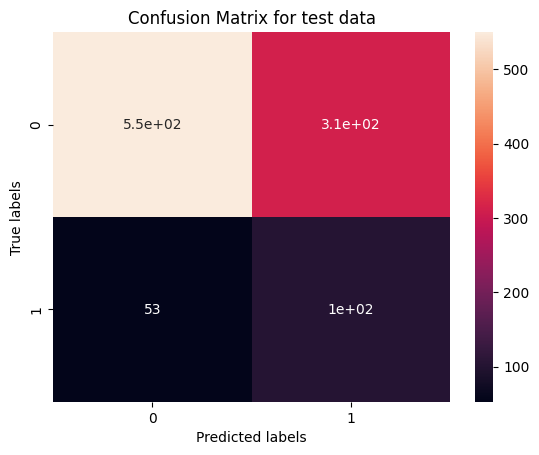

In [118]:
# Visualizing evaluation Metric Score chart
evaluation_metrics(y_smote, train_nbcv, y_test, test_nbcv)

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV is used for cross validation. The params_NB dictionary shows hyperparameter values for a Naive Bayes classifier, where Laplace smoothing parameter (var_smoothing) has a range of values which is defined by np.logspace. Here, recall score and FN obtained are 0.65 and 54 respectively.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

There is an improvement in recall score and FN values when compared with naive bayes without cross validation.

#### Explain each evaluation metric's indication towards business and the business impact of the ML model used.

Using Naive bayes classifier with cross validation model which predicts more false negatives and less recall score is a negative impact on hospitals as the patients dont get treated for the disease when they are actually having a risk for CHD.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?


* We considered recall score as evaluation metrics.
* Recall is defined as the number of true positives divided by the total number of actual positives. Actual positives is the sum of true positives and false negatives.
* In our dataset, error in predicting false negative has to be reduced. Hence, recall score is appropriate to select the best model.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

From all the predictions and evaluation metrics, we observed that decision tree with hyperparameter tuning gave the best recall score and FN value, which are 0.806 and 30. As of now, we can say that using this model 80 percent of the predictions will be true and also we have very less FN value when compared to other models.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

<Axes: title={'center': 'Feature Importances: DECISION TREE'}>

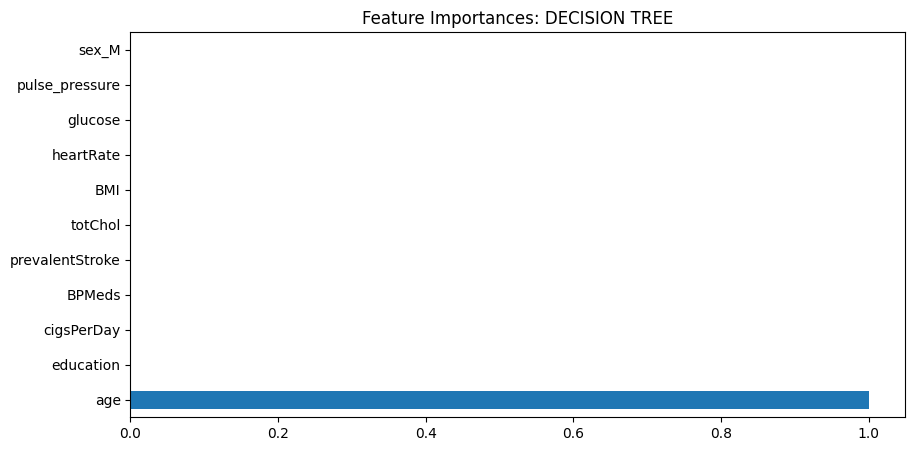

In [166]:
# Extracting feature importance in terms of values for each variable using decision tree with hyperparameter tuning
dt_feat_imp = pd.Series(dt_optimal_model.feature_importances_, index=x.columns)
plt.figure(figsize=(10,5))
plt.title('Feature Importances: DECISION TREE')
plt.xlabel('Relative Importance')
dt_feat_imp.nlargest(20).plot(kind='barh')

<Axes: title={'center': 'Feature Importances: Random Forest'}>

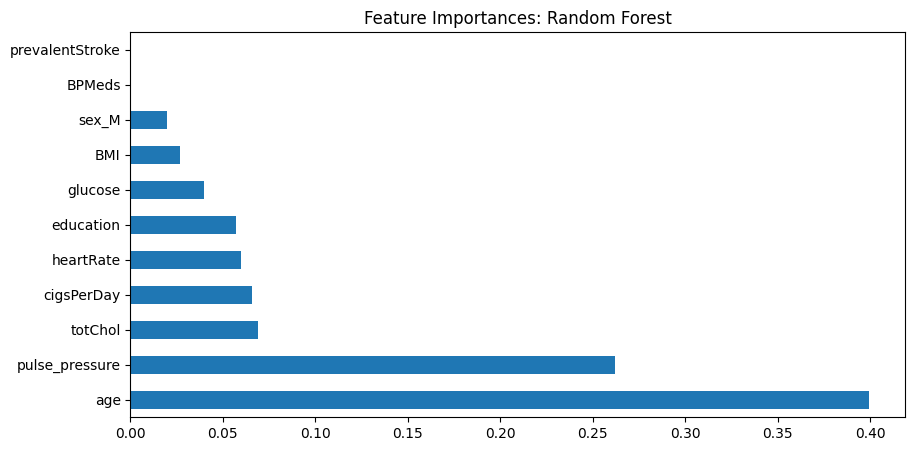

In [168]:
# Feature importance using random forest with hyperparameter tuning model
rf_feat_imp = pd.Series(rfc_optimal_model.feature_importances_, index=x.columns)
plt.figure(figsize=(10,5))
plt.title('Feature Importances: Random Forest')
plt.xlabel('Relative Importance')
rf_feat_imp.nlargest(20).plot(kind='barh')

Here as the best performed model was decision tree with hyperparameter tuning, we performed feature importances where it is observed that only age had the contribution for TenYearCHD risk. However, we used random forest with hyperparameter tuning model to check feature importances as we cannot rely on previous result. Therefore, we can see that age had the maximum contribution followed by pulse_pressure, totChol, cigsPerDay, heartRate, and Education.

# **Conclusion**

**1. CONCLUSION FROM EDA**

After performing few analysis for the given dataset, it can be concluded that

*   From the analysis, TenYearCHD column is plotted where there are very less people who are having the risk for cardiovascular diseases.
*   Most of the records who has risk to CHD are in the age group between 38 to 68 in which maximum patients having CHD risk are of 63 years old followed by 52 years old.
*   SysBP above 130 and diaBP above 80 can lead to a risk for CHD.
*   Higher level of cholesterol can lead to a risk for CHD.
*   16% of patients had risk for CHD under smoking category whereas 13% of patients had risk under no smoking category. Therefore, smoking increased risk for CHD.
*    It is observed that measure of glucose upto 80, no difference is seen whereas after 80 it seems like effecting to have risk for CHD.

**2. CONCLUSION FROM MODEL IMPLEMENTATION**

First we performed feature engineering which involves
* In the dataset, there are missing values in Education, BPMeds, cigsPerDay, totChol, BMI, heartRate, and glucose.
   1.   Education, and BPMeds variables are imputed with mode as they are categorical
   2.   Median value is imputed for cigsPerDay, totChol, BMI, and heartRate
   3.   For glucose we used KNN imputer as it had 304 missing values.
* In multicollinearity section, we finalised numerical columns with the help of correlation values from heatmap.
* Then we found outliers in cigsPerDay, totChol, BMI, heartRate, glucose, and pulse_pressure. Using 95th and 5th percentile considering them as upper and lower limits of the variable, then we capped the points above upper limit and below lower limits with 95th and 5th percentiles respectively.
* Then performed categorical encoding for sex and is_smoking.
* We selected age, education, cigsPerDay, BPMeds, prevalentStroke, totCHol, BMI, heartRate, glucose, pulse_pressure, and sex_M for model building.
* Now coming to the model implementation and their respective evaluation metrics for test data. Here we considered recall score and FN value as evaluation metrics.
1. Decision Tree
* Recall score - 0.316
* FN value - 1.1e+02
1.1 Decision tree with hyperparameter tuning
* Recall score - 0.806
* FN value - 30
2. Logistic regression
* Recall score - 0.645
* FN value - 55
2.1. Logistic regression with hyperparameter tuning
* Recall score - 0.72
3. Random forest
* Recall score - 0.225
* FN value - 1.2e+02
3.1. Random forest with hyperparameter tuning
* Recall score - 0.62
* FN value - 58
4. KNN classifier
* Recall score - 0.65
* FN value - 54
4.1 KNN with hyperparameter tuning
* Recall score - 0.27
* FN value - 1.1e+02
5. SVM
* Recall score - 0.58
* FN value - 65
5.1 SVM with hyperparameter tuning
* Recall score - 0.28
* FN value - 1.1e+02
6. Naive bayes classifier
* Recall score - 0.45
* FN value - 84
6.1 Naive bayes with hyperparameter tuning
* Recall score - 0.65
* FN value - 54

Therefore, On comparing the models built, we noticed that Decision tree with hyperparameter tuning performed better with high recall score and low FN value. Also, looking at the feature importance, we can say that age had the highest contribution followed by pulse_pressure, totChol, cigsPerDay, heartRate, and Education.


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***